# Environment set up

In this section we will set up a Colab environment for the MLEnd mini-project. Before starting, follow these simple instructions: 

1.   Go to https://drive.google.com/
2.   Create a folder named 'Data' in 'MyDrive': On the left, click 'New' > 'Folder', enter the name 'Data', and click 'create'
3.   Open the 'Data' folder and create a folder named 'MLEndHW'.

Let's start by loading a few useful Python libraries and mounting our personal Google Drive storage system (i.e. making it available).

In [61]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [62]:
import anvil.server
import anvil.media

In [63]:
anvil.server.connect("KUNBWE6ORNY3QZ4YAPQO6A3D-63XAIBJQC5THKLAF")

In [64]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data download

In this section we will download a small subsample of the MLEnd Hums and Whistles Dataset. 

You should be able to download the entire training dataset using a similar approach to the one used here for the subsample. As you will see, you only need to provide a different link. 

Please note that even though we call it "training" dataset you can do whatever you want with it (for instance validate a set of models). We have kept a separate dataset for testing purposes, which we won't share with anyone.

First, let's define a function that will allow us to download a file into a chosen location.

In [65]:
def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
        with open(save_path, 'wb') as out_file:
            out_file.write(dl_file.read())

The next step is to download the file 'MLEndHW_Sample.zip' into the folder 'MyDrive/Data/MLEndHW'. Note that this might take a while!

In [66]:
url1  = " https://collect.qmul.ac.uk/down?t=6122TDAA73VPCMDQ/5DSHD27BLQMK5S8E1HLG19O"
save_path1 = '/content/drive/MyDrive/Data/MLEndHW/ML_potter_part1.zip'
download_url(url1, save_path1)

In [67]:
url2  = " https://collect.qmul.ac.uk/down?t=4LV64IN5OK5E35NN/4H6DJTRS7KVD704UG2CN0IG"
save_path2 = '/content/drive/MyDrive/Data/MLEndHW/ML_potter_part2.zip'
download_url(url2, save_path2)

In [68]:
url3  = "https://collect.qmul.ac.uk/down?t=650T7K3FAE26MB29/592IN2FALUM43SGC35O0580"
save_path3 = '/content/drive/MyDrive/Data/MLEndHW/ML_starwars_part1.zip'
download_url(url3, save_path3)

In [69]:
url4  = "https://collect.qmul.ac.uk/down?t=6L5DHHRODAMK82R8/4512VDDUEFGBAPK0S82ENGO"
save_path4 = '/content/drive/MyDrive/Data/MLEndHW/ML_starwars_part2.zip'
download_url(url4, save_path4)

Run the following cell to check that the MLEndHW folder contains the file 'MLEndHW_Sample.zip':

In [70]:
path = '/content/drive/MyDrive/Data/MLEndHW'
os.listdir(path)

['sample',
 'MLEndHW_Sample.zip',
 'ML_potter_part1.zip',
 'ML_potter_part2.zip',
 'ML_starwars_part1.zip',
 'ML_starwars_part2.zip']

# Understanding our dataset sample

Let's unzip the sample data and check how many audio files we have.

In [71]:
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/sample/ML_potter_part1'
zip_path = '/content/drive/MyDrive/Data/MLEndHW/ML_potter_part1.zip'
#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#  zip_ref.extractall(directory_to_extract_to)

In [72]:
sample_path = '/content/drive/MyDrive/Data/MLEndHW/sample/ML_potter_part1/*.wav'
potter_files1 = glob.glob(sample_path)
len(potter_files1)

206

In [73]:
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/sample/ML_potter_part2'
zip_path = '/content/drive/MyDrive/Data/MLEndHW/ML_potter_part2.zip'
#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
 #   zip_ref.extractall(directory_to_extract_to)

In [74]:
sample_path = '/content/drive/MyDrive/Data/MLEndHW/sample/ML_potter_part2/*.wav'
potter_files2 = glob.glob(sample_path)
len(potter_files2)

205

In [75]:
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/sample/ML_starwars_part2'
zip_path = '/content/drive/MyDrive/Data/MLEndHW/ML_potter_part2.zip'
#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  #zip_ref.extractall(directory_to_extract_to)

In [76]:
sample_path = '/content/drive/MyDrive/Data/MLEndHW/sample/ML_starwars_part1/*.wav'
starwars_files1 = glob.glob(sample_path)
#len(starwars_files1)

In [77]:
sample_path = '/content/drive/MyDrive/Data/MLEndHW/sample/ML_starwars_part2/*.wav'
starwars_files2 = glob.glob(sample_path)
#len(starwars_files2)

In [78]:
potter_files = potter_files1 + potter_files2
starwars_files = starwars_files1 + starwars_files2

In [79]:
len(potter_files)
len(starwars_files)

413

In [80]:
files = potter_files + starwars_files

In [81]:
len(files)

824

This figure (98) corresponds to the number of **items** or **samples** in our dataset. Let's listen to some random audio files:

In [82]:
for _ in range(1):
  n = np.random.randint(98)
  display(ipd.Audio(files[n]))

Can you recognise each song? Can you tell whether the interpreters are humming or whistling to the song?

Let's have a look at the name of the 98 audio file:

In [83]:
for file in files:
  print(file.split('/')[-1])

S1_hum_2_Potter.wav
S1_whistle_2_Potter.wav
S2_hum_2_Potter.wav
S3_hum_2_Potter.wav
S3_hum_1_Potter.wav
S2_whistle_2_Potter.wav
S4_hum_1_Potter.wav
S4_hum_2_Potter.wav
S6_hum_2_Potter.wav
S5_hum_2_Potter.wav
S5_hum_1_Potter.wav
S6_whistle_2_Potter.wav
S7_hum_1_Potter.wav
S8_hum_1_[Potter].wav
S7_hum_2_Potter.wav
S8_hum_4_[Potter].wav
S9_hum_1_Potter.wav
S10_hum_2_Potter .wav
S9_hum_2_Potter.wav
S10_hum_1_Potter .wav
S12_hum_4_Potter .wav
S12_hum_2_Potter .wav
S74_hum_1_Potter.wav
S75_hum_2_Potter.wav
S75_whistle_2_Potter.wav
S80_hum_2_Potter.wav
S82_hum_4_[Potter].wav
S80_whistle_2_Potter.wav
S84_hum_1_Potter.wav
S84_hum_2_Potter.wav
S86_hum_2_Potter.wav
S87_whistle_2_Potter.wav
S88_hum_1_[potter].wav
S87_hum_2_Potter.wav
S89_hum_2_Potter.wav
S89_whistle_2_Potter.wav
S90_hum_2_Potter.wav
S91_whistle_2_Potter.wav
S13_hum_1_Potter.wav
S92_Hum_2_Potter.wav
S13_hum_2_Potter.wav
S96_whistle_1_[Potter].wav
S97_hum_1_Potter.wav
S15_hum_2_Potter.wav
S15_whistle_2_Potter.wav
S16_hum_2_Potter.wa

As you can see, the name of each file follows the naming convention `[Participant ID]_[type of recording]_[interpretation number]_[song]`. We can parse each file name and extract this information. Let's do it for the first one:

In [84]:
print('The full path to the first audio file is: ', files[0])
print('\n')
print('The name of the first audio file is: ', files[0].split('/')[-1])
print('The participand ID is: ', files[0].split('/')[-1].split('_')[0])
print('The type of interpretation is: ', files[0].split('/')[-1].split('_')[1])
print('The interpretation number is: ', files[0].split('/')[-1].split('_')[2])
print('The song is: ', files[0].split('/')[-1].split('_')[3])

The full path to the first audio file is:  /content/drive/MyDrive/Data/MLEndHW/sample/ML_potter_part1/S1_hum_2_Potter.wav


The name of the first audio file is:  S1_hum_2_Potter.wav
The participand ID is:  S1
The type of interpretation is:  hum
The interpretation number is:  2
The song is:  Potter.wav


We can create a table-like structure using Python lists that collects the information that we can extract from the names of the audio files:

In [85]:
ML_potter_table = []

for file in potter_files:
  file_name = file.split('/')[-1]
  ML_potter_table.append([file_name])

ML_potter_table

[['S1_hum_2_Potter.wav'],
 ['S1_whistle_2_Potter.wav'],
 ['S2_hum_2_Potter.wav'],
 ['S3_hum_2_Potter.wav'],
 ['S3_hum_1_Potter.wav'],
 ['S2_whistle_2_Potter.wav'],
 ['S4_hum_1_Potter.wav'],
 ['S4_hum_2_Potter.wav'],
 ['S6_hum_2_Potter.wav'],
 ['S5_hum_2_Potter.wav'],
 ['S5_hum_1_Potter.wav'],
 ['S6_whistle_2_Potter.wav'],
 ['S7_hum_1_Potter.wav'],
 ['S8_hum_1_[Potter].wav'],
 ['S7_hum_2_Potter.wav'],
 ['S8_hum_4_[Potter].wav'],
 ['S9_hum_1_Potter.wav'],
 ['S10_hum_2_Potter .wav'],
 ['S9_hum_2_Potter.wav'],
 ['S10_hum_1_Potter .wav'],
 ['S12_hum_4_Potter .wav'],
 ['S12_hum_2_Potter .wav'],
 ['S74_hum_1_Potter.wav'],
 ['S75_hum_2_Potter.wav'],
 ['S75_whistle_2_Potter.wav'],
 ['S80_hum_2_Potter.wav'],
 ['S82_hum_4_[Potter].wav'],
 ['S80_whistle_2_Potter.wav'],
 ['S84_hum_1_Potter.wav'],
 ['S84_hum_2_Potter.wav'],
 ['S86_hum_2_Potter.wav'],
 ['S87_whistle_2_Potter.wav'],
 ['S88_hum_1_[potter].wav'],
 ['S87_hum_2_Potter.wav'],
 ['S89_hum_2_Potter.wav'],
 ['S89_whistle_2_Potter.wav'],
 ['S90

In [86]:
ML_starwars_table = []

for file in starwars_files:
  file_name = file.split('/')[-1]
  ML_starwars_table.append([file_name])

ML_starwars_table

[['S100_hum_3_StarWars.wav'],
 ['S100_hum_4_StarWars.wav'],
 ['S88_hum_1_[StarWars].wav'],
 ['S88_hum_2_[StarWars].wav'],
 ['S21_hum_3_StarWars.wav'],
 ['S84_hum_3_StarWars.wav'],
 ['S21_hum_4_StarWars.wav'],
 ['S84_hum_4_StarWars.wav'],
 ['S63_hum_4_[Starwars].wav'],
 ['S111_hum_3_StarWars.wav'],
 ['S26_hum_3_StarWars.wav'],
 ['S26_hum_4_StarWars.wav'],
 ['S63_hum_3_[Starwars].wav'],
 ['S70_hum_4_StarWars.wav'],
 ['S70_hum_3_StarWars.wav'],
 ['S19_hum_3_StarWars.wav'],
 ['S111_hum_4_StarWars.wav'],
 ['S53_hum_4_StarWars.wav'],
 ['S53_hum_3_StarWars.wav'],
 ['S28_hum_3_StarWars.wav'],
 ['S108_whistle_2_StarWars.wav'],
 ['S19_hum_4_StarWars.wav'],
 ['S108_hum_2_StarWars.wav'],
 ['S28_hum_4_StarWars.wav'],
 ['S77_hum_2_StarWars.wav'],
 ['S77_whistle_2_StarWars.wav'],
 ['S101_hum_3_StarWars.wav'],
 ['S101_hum_4_StarWars.wav'],
 ['S99_hum_1_[StarWars].wav'],
 ['S99_hum_2_[StarWars].wav'],
 ['S92_Hum_3_StarWars.wav'],
 ['S92_Hum_2_StarWars.wav'],
 ['S59_hum_4_StarWars.wav'],
 ['S59_hum_3_St

In [87]:
MLEND_potter_table = [] 

for file in potter_files:
  file_name = file.split('/')[-1]
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  #interpretation_number = file.split('/')[-1].split('_')[2]
  song = 'potter'
  MLEND_potter_table.append([file_name,participant_ID,interpretation_type, song])

MLEND_potter_table

[['S1_hum_2_Potter.wav', 'S1', 'hum', 'potter'],
 ['S1_whistle_2_Potter.wav', 'S1', 'whistle', 'potter'],
 ['S2_hum_2_Potter.wav', 'S2', 'hum', 'potter'],
 ['S3_hum_2_Potter.wav', 'S3', 'hum', 'potter'],
 ['S3_hum_1_Potter.wav', 'S3', 'hum', 'potter'],
 ['S2_whistle_2_Potter.wav', 'S2', 'whistle', 'potter'],
 ['S4_hum_1_Potter.wav', 'S4', 'hum', 'potter'],
 ['S4_hum_2_Potter.wav', 'S4', 'hum', 'potter'],
 ['S6_hum_2_Potter.wav', 'S6', 'hum', 'potter'],
 ['S5_hum_2_Potter.wav', 'S5', 'hum', 'potter'],
 ['S5_hum_1_Potter.wav', 'S5', 'hum', 'potter'],
 ['S6_whistle_2_Potter.wav', 'S6', 'whistle', 'potter'],
 ['S7_hum_1_Potter.wav', 'S7', 'hum', 'potter'],
 ['S8_hum_1_[Potter].wav', 'S8', 'hum', 'potter'],
 ['S7_hum_2_Potter.wav', 'S7', 'hum', 'potter'],
 ['S8_hum_4_[Potter].wav', 'S8', 'hum', 'potter'],
 ['S9_hum_1_Potter.wav', 'S9', 'hum', 'potter'],
 ['S10_hum_2_Potter .wav', 'S10', 'hum', 'potter'],
 ['S9_hum_2_Potter.wav', 'S9', 'hum', 'potter'],
 ['S10_hum_1_Potter .wav', 'S10', 'hum

In [88]:
MLEND_starwars_table = [] 

for file in starwars_files:
  file_name = file.split('/')[-1]
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  #interpretation_number = file.split('/')[-1].split('_')[2]
  song = 'starwars'
  MLEND_starwars_table.append([file_name,participant_ID,interpretation_type, song])

MLEND_starwars_table

[['S100_hum_3_StarWars.wav', 'S100', 'hum', 'starwars'],
 ['S100_hum_4_StarWars.wav', 'S100', 'hum', 'starwars'],
 ['S88_hum_1_[StarWars].wav', 'S88', 'hum', 'starwars'],
 ['S88_hum_2_[StarWars].wav', 'S88', 'hum', 'starwars'],
 ['S21_hum_3_StarWars.wav', 'S21', 'hum', 'starwars'],
 ['S84_hum_3_StarWars.wav', 'S84', 'hum', 'starwars'],
 ['S21_hum_4_StarWars.wav', 'S21', 'hum', 'starwars'],
 ['S84_hum_4_StarWars.wav', 'S84', 'hum', 'starwars'],
 ['S63_hum_4_[Starwars].wav', 'S63', 'hum', 'starwars'],
 ['S111_hum_3_StarWars.wav', 'S111', 'hum', 'starwars'],
 ['S26_hum_3_StarWars.wav', 'S26', 'hum', 'starwars'],
 ['S26_hum_4_StarWars.wav', 'S26', 'hum', 'starwars'],
 ['S63_hum_3_[Starwars].wav', 'S63', 'hum', 'starwars'],
 ['S70_hum_4_StarWars.wav', 'S70', 'hum', 'starwars'],
 ['S70_hum_3_StarWars.wav', 'S70', 'hum', 'starwars'],
 ['S19_hum_3_StarWars.wav', 'S19', 'hum', 'starwars'],
 ['S111_hum_4_StarWars.wav', 'S111', 'hum', 'starwars'],
 ['S53_hum_4_StarWars.wav', 'S53', 'hum', 'starwa

We can load the table into a Pandas DataFrame and usie the additional functionalities of Pandas to explore the information extracted from the names of the audio files.

In [89]:
MLEND_potter_table = pd.DataFrame(MLEND_potter_table,columns=['file_id','participant','interpretation','song']).set_index('file_id') 
MLEND_potter_table

participant interpretation    song
file_id                                                     
S1_hum_2_Potter.wav                S1            hum  potter
S1_whistle_2_Potter.wav            S1        whistle  potter
S2_hum_2_Potter.wav                S2            hum  potter
S3_hum_2_Potter.wav                S3            hum  potter
S3_hum_1_Potter.wav                S3            hum  potter
...                               ...            ...     ...
S218_hum_2_Potter.wav            S218            hum  potter
S221_hum_2_Potter.wav            S221            hum  potter
S222_hum_2_Potter.wav            S222            hum  potter
S221_whistle_2_Potter.wav        S221        whistle  potter
S222_whistle_2_Potter.wav        S222        whistle  potter

[411 rows x 3 columns]

In [90]:
MLEND_starwars_table = pd.DataFrame(MLEND_starwars_table,columns=['file_id','participant','interpretation','song']).set_index('file_id') 
MLEND_starwars_table

participant interpretation      song
file_id                                                         
S100_hum_3_StarWars.wav            S100            hum  starwars
S100_hum_4_StarWars.wav            S100            hum  starwars
S88_hum_1_[StarWars].wav            S88            hum  starwars
S88_hum_2_[StarWars].wav            S88            hum  starwars
S21_hum_3_StarWars.wav              S21            hum  starwars
...                                 ...            ...       ...
S149_hum_4_StarWars.wav            S149            hum  starwars
S208_hum_2_StarWars.wav            S208            hum  starwars
S208_whistle_2_StarWars.wav        S208        whistle  starwars
S138_hum_1_Imperial.wav            S138            hum  starwars
S138_whistle_1_Imperial.wav        S138        whistle  starwars

[413 rows x 3 columns]

In [91]:
combined = [MLEND_potter_table, MLEND_starwars_table]
MLENDHW_df = pd.concat(combined)
MLENDHW_df

participant interpretation      song
file_id                                                         
S1_hum_2_Potter.wav                  S1            hum    potter
S1_whistle_2_Potter.wav              S1        whistle    potter
S2_hum_2_Potter.wav                  S2            hum    potter
S3_hum_2_Potter.wav                  S3            hum    potter
S3_hum_1_Potter.wav                  S3            hum    potter
...                                 ...            ...       ...
S149_hum_4_StarWars.wav            S149            hum  starwars
S208_hum_2_StarWars.wav            S208            hum  starwars
S208_whistle_2_StarWars.wav        S208        whistle  starwars
S138_hum_1_Imperial.wav            S138            hum  starwars
S138_whistle_1_Imperial.wav        S138        whistle  starwars

[824 rows x 3 columns]

# Feature extraction : Picth

Audio files are complex data types. Specifically they are **discrete signals** or **time series**, consisting of values on a 1D temporal grid. These values are known as *samples* themselves, which might be a bit confusing, as we have used this term to refer to the *items* in our dataset. The **sampling frequency** is the rate at which samples in an audio file are produced. For instance a sampling frequency of 5HZ indicates that 5 produce 5 samples per second, or 1 sample every 0.2 s.

Let's plot one of our audio signals:

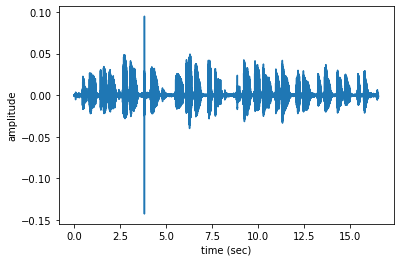

In [92]:
n=0
fs = None # Sampling frequency. If None, fs would be 22050
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

Can you recognise the song and interpretation type? Does it agree with the values shown in the ``` MLENDHW_df ``` dataframe? Let's check it:
 

In [93]:
MLENDHW_df.loc[files[n].split('/')[-1]]

participant           S1
interpretation       hum
song              potter
Name: S1_hum_2_Potter.wav, dtype: object

Note that we are using the name of the audio file as the index in the Pandas DataFrame. In this example the actual name of the audio file happens to supply the same information, but in general this won't be the case. By changing the value of `n` in the previous cell, you can listen to other examples. If you are doing this during one of our lab sessions, please make sure that your mic is muted!

Exactly, how complex is an audio signal? Let's start by looking at the number of samples in one of our audio files:

In [94]:
n=0
x, fs = librosa.load(files[n],sr=fs)
print('This audio signal has', len(x), 'samples')

This audio signal has 730105 samples


If we are using a raw audio signal as the input of a machine learning model, we will be operating in a predictor space consisting of hundreds of thousands of dimensions. Compare this figure with the number of items (i.e. recordings) that we have. Do we have enough samples to train a model that takes one of these audio signals as an input?

One approach to deal with this huge dimensionality is to extract a few features from our signals and use these features as predictors instead. In this notebook we will use four audio features, namely:


1.   Power.
2.   Pitch mean.
3.   Pitch standard deviation.
4.   Fraction of voiced region.

In the next cell, we define a new function that gets the pitch of an audio signal (do not worry if you do not know what it is, but feel free to read about it!).

In [95]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

Let's consider the problem of identifying the type of interpretation of one of the audio recordings. Then next cell defines a function that takes a number of files and creates a NumPy array containing the 4 audio features used as predictors (`X`) and a binary label (`y`), that indicates whether the type of interpretation is a hum (`y=1`) or whistle (`y=0`).

In [96]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    print(file_name)
    print(labels_file.loc[fileID]['song'])
    print(labels_file.loc[fileID]['song']=='potter')
    yi = list(labels_file.loc[fileID]['song'])[0]=='potter'
    yi = labels_file.loc[fileID]['song']=='potter'

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    xi = [power,pitch_mean,pitch_std,voiced_fr]
    X.append(xi)
    y.append(yi)

  return np.array(X),np.array(y)

Let's apply `getXy` to the subsample and obtain the NumPy predictor array (`X`) and a binary label (`y`). This could take a while, as we are processing each of the 98 recordings. 

In [97]:
X,y = getXy(files, labels_file=MLENDHW_df, scale_audio=True, onlySingleDigit=True)

  0%|          | 0/824 [00:00<?, ?it/s]

S1_hum_2_Potter.wav
potter
True


  0%|          | 1/824 [00:03<43:20,  3.16s/it]

S1_whistle_2_Potter.wav
potter
True


  0%|          | 2/824 [00:06<44:16,  3.23s/it]

S2_hum_2_Potter.wav
potter
True


  0%|          | 3/824 [00:09<42:45,  3.13s/it]

S3_hum_2_Potter.wav
potter
True


  0%|          | 4/824 [00:12<40:03,  2.93s/it]

S3_hum_1_Potter.wav
potter
True


  1%|          | 5/824 [00:14<38:03,  2.79s/it]

S2_whistle_2_Potter.wav
potter
True


  1%|          | 6/824 [00:17<39:25,  2.89s/it]

S4_hum_1_Potter.wav
potter
True


  1%|          | 7/824 [00:20<40:11,  2.95s/it]

S4_hum_2_Potter.wav
potter
True


  1%|          | 8/824 [00:24<42:27,  3.12s/it]

S6_hum_2_Potter.wav
potter
True


  1%|          | 9/824 [00:27<41:40,  3.07s/it]

S5_hum_2_Potter.wav
potter
True


  1%|          | 10/824 [00:30<41:25,  3.05s/it]

S5_hum_1_Potter.wav
potter
True


  1%|▏         | 11/824 [00:33<42:51,  3.16s/it]

S6_whistle_2_Potter.wav
potter
True


  1%|▏         | 12/824 [00:36<43:34,  3.22s/it]

S7_hum_1_Potter.wav
potter
True


  2%|▏         | 13/824 [00:39<42:08,  3.12s/it]

S8_hum_1_[Potter].wav
potter
True


  2%|▏         | 14/824 [00:42<40:20,  2.99s/it]

S7_hum_2_Potter.wav
potter
True


  2%|▏         | 15/824 [00:45<39:44,  2.95s/it]

S8_hum_4_[Potter].wav
potter
True


  2%|▏         | 16/824 [00:48<39:01,  2.90s/it]

S9_hum_1_Potter.wav
potter
True


  2%|▏         | 17/824 [00:51<38:38,  2.87s/it]

S10_hum_2_Potter .wav
potter
True


  2%|▏         | 18/824 [00:53<37:11,  2.77s/it]

S9_hum_2_Potter.wav
potter
True


  2%|▏         | 19/824 [00:56<37:05,  2.77s/it]

S10_hum_1_Potter .wav
potter
True


  2%|▏         | 20/824 [00:58<36:18,  2.71s/it]

S12_hum_4_Potter .wav
potter
True


  3%|▎         | 21/824 [01:05<50:08,  3.75s/it]

S12_hum_2_Potter .wav
potter
True


  3%|▎         | 22/824 [01:07<44:18,  3.31s/it]

S74_hum_1_Potter.wav
potter
True


  3%|▎         | 23/824 [01:10<43:11,  3.24s/it]

S75_hum_2_Potter.wav
potter
True


  3%|▎         | 24/824 [01:13<41:53,  3.14s/it]

S75_whistle_2_Potter.wav
potter
True


  3%|▎         | 25/824 [01:16<42:20,  3.18s/it]

S80_hum_2_Potter.wav
potter
True


  3%|▎         | 26/824 [01:19<40:53,  3.07s/it]

S82_hum_4_[Potter].wav
potter
True


  3%|▎         | 27/824 [01:21<38:39,  2.91s/it]

S80_whistle_2_Potter.wav
potter
True


  3%|▎         | 28/824 [01:24<38:29,  2.90s/it]

S84_hum_1_Potter.wav
potter
True


  4%|▎         | 29/824 [01:27<36:48,  2.78s/it]

S84_hum_2_Potter.wav
potter
True


  4%|▎         | 30/824 [01:29<35:43,  2.70s/it]

S86_hum_2_Potter.wav
potter
True


  4%|▍         | 31/824 [01:32<36:47,  2.78s/it]

S87_whistle_2_Potter.wav
potter
True


  4%|▍         | 32/824 [01:35<37:03,  2.81s/it]

S88_hum_1_[potter].wav
potter
True


  4%|▍         | 33/824 [01:38<35:19,  2.68s/it]

S87_hum_2_Potter.wav
potter
True


  4%|▍         | 34/824 [01:40<35:41,  2.71s/it]

S89_hum_2_Potter.wav
potter
True


  4%|▍         | 35/824 [01:43<36:56,  2.81s/it]

S89_whistle_2_Potter.wav
potter
True


  4%|▍         | 36/824 [01:46<37:53,  2.89s/it]

S90_hum_2_Potter.wav
potter
True


  4%|▍         | 37/824 [01:49<38:21,  2.92s/it]

S91_whistle_2_Potter.wav
potter
True


  5%|▍         | 38/824 [01:52<37:18,  2.85s/it]

S13_hum_1_Potter.wav
potter
True


  5%|▍         | 39/824 [01:55<37:27,  2.86s/it]

S92_Hum_2_Potter.wav
potter
True


  5%|▍         | 40/824 [02:00<47:02,  3.60s/it]

S13_hum_2_Potter.wav
potter
True


  5%|▍         | 41/824 [02:03<43:59,  3.37s/it]

S96_whistle_1_[Potter].wav
potter
True


  5%|▌         | 42/824 [02:06<43:23,  3.33s/it]

S97_hum_1_Potter.wav
potter
True


  5%|▌         | 43/824 [02:09<39:10,  3.01s/it]

S15_hum_2_Potter.wav
potter
True


  5%|▌         | 44/824 [02:11<38:01,  2.92s/it]

S15_whistle_2_Potter.wav
potter
True


  5%|▌         | 45/824 [02:14<37:49,  2.91s/it]

S16_hum_2_Potter.wav
potter
True


  6%|▌         | 46/824 [02:18<39:05,  3.01s/it]

S17_hum_1_Potter.wav
potter
True


  6%|▌         | 47/824 [02:20<37:32,  2.90s/it]

S18_Whistle_2_Potter.wav
potter
True


  6%|▌         | 48/824 [02:23<37:16,  2.88s/it]

S16_whistle_2_Potter.wav
potter
True


  6%|▌         | 49/824 [02:27<39:37,  3.07s/it]

S18_Hum_2_Potter.wav
potter
True


  6%|▌         | 50/824 [02:29<38:01,  2.95s/it]

S17_hum_2_Potter.wav
potter
True


  6%|▌         | 51/824 [02:32<36:35,  2.84s/it]

S19_hum_1_Potter.wav
potter
True


  6%|▋         | 52/824 [02:35<36:42,  2.85s/it]

S19_hum_2_Potter.wav
potter
True


  6%|▋         | 53/824 [02:38<37:46,  2.94s/it]

S20_hum_1_Potter.wav
potter
True


  7%|▋         | 54/824 [02:41<36:48,  2.87s/it]

S20_hum_2_Potter.wav
potter
True


  7%|▋         | 55/824 [02:43<35:57,  2.81s/it]

S22_hum_2_Potter.wav
potter
True


  7%|▋         | 56/824 [02:46<36:15,  2.83s/it]

S21_hum_1_Potter.wav
potter
True


  7%|▋         | 57/824 [02:49<35:21,  2.77s/it]

S23_hum_1_Potter.wav
potter
True


  7%|▋         | 58/824 [02:52<35:46,  2.80s/it]

S22_hum_1_Potter.wav
potter
True


  7%|▋         | 59/824 [02:54<35:18,  2.77s/it]

S21_hum_2_Potter.wav
potter
True


  7%|▋         | 60/824 [02:57<34:10,  2.68s/it]

S24_hum_2_Potter.wav
potter
True


  7%|▋         | 61/824 [03:00<37:02,  2.91s/it]

S23_hum_2_Potter.wav
potter
True


  8%|▊         | 62/824 [03:03<37:29,  2.95s/it]

S24_whistle_2_Potter.wav
potter
True


  8%|▊         | 63/824 [03:07<40:54,  3.23s/it]

S25_hum_1_Potter.wav
potter
True


  8%|▊         | 64/824 [03:11<42:13,  3.33s/it]

S25_hum_2_Potter.wav
potter
True


  8%|▊         | 65/824 [03:14<41:23,  3.27s/it]

S28_hum_2_Potter.wav
potter
True


  8%|▊         | 66/824 [03:16<38:32,  3.05s/it]

S26_hum_1_Potter.wav
potter
True


  8%|▊         | 67/824 [03:20<41:30,  3.29s/it]

S29_whistle_2_potter.wav
potter
True


  8%|▊         | 68/824 [03:23<39:55,  3.17s/it]

S26_hum_2_Potter.wav
potter
True


  8%|▊         | 69/824 [03:27<41:30,  3.30s/it]

S28_hum_1_Potter.wav
potter
True


  8%|▊         | 70/824 [03:29<38:41,  3.08s/it]

S29_hum_2_Potter.wav
potter
True


  9%|▊         | 71/824 [03:32<37:24,  2.98s/it]

S30_hum_1_Potter.wav
potter
True


  9%|▊         | 72/824 [03:35<37:01,  2.95s/it]

S30_hum_2_Potter.wav
potter
True


  9%|▉         | 73/824 [03:38<37:15,  2.98s/it]

S31_hum_1_Potter.wav
potter
True


  9%|▉         | 74/824 [03:41<36:44,  2.94s/it]

S31_hum_2_Potter.wav
potter
True


  9%|▉         | 75/824 [03:44<36:09,  2.90s/it]

S32_hum_2_Potter.wav
potter
True


  9%|▉         | 76/824 [03:47<36:37,  2.94s/it]

S32_whistle_2_Potter.wav
potter
True


  9%|▉         | 77/824 [03:50<38:44,  3.11s/it]

S34_whistle_2_Potter.wav
potter
True


  9%|▉         | 78/824 [03:53<37:27,  3.01s/it]

S34_hum_2_Potter.wav
potter
True


 10%|▉         | 79/824 [03:56<36:25,  2.93s/it]

S35_hum_1_[Potter].wav
potter
True


 10%|▉         | 80/824 [03:58<34:49,  2.81s/it]

S35_hum_4_[Potter].wav
potter
True


 10%|▉         | 81/824 [04:01<35:34,  2.87s/it]

S36_hum_2_Potter.wav
potter
True


 10%|▉         | 82/824 [04:04<35:32,  2.87s/it]

S36_hum_1_Potter.wav
potter
True


 10%|█         | 83/824 [04:07<35:40,  2.89s/it]

S37_hum_1_[Potter].wav
potter
True


 10%|█         | 84/824 [04:10<35:37,  2.89s/it]

S38_hum_1_Potter.wav .wav
potter
True


 10%|█         | 85/824 [04:12<33:25,  2.71s/it]

S37_whistle_1_[Potter].wav
potter
True


 10%|█         | 86/824 [04:15<34:03,  2.77s/it]

S38_hum_3_Potterwav.wav
potter
True


 11%|█         | 87/824 [04:17<31:46,  2.59s/it]

S39_hum_2_Potter.wav
potter
True


 11%|█         | 88/824 [04:20<31:48,  2.59s/it]

S41_hum_1_Potter.wav
potter
True


 11%|█         | 89/824 [04:22<31:17,  2.55s/it]

S39_whistle_2_Potter.wav
potter
True


 11%|█         | 90/824 [04:25<31:44,  2.59s/it]

S40_whistle_2_potter.wav
potter
True


 11%|█         | 91/824 [04:28<33:05,  2.71s/it]

S40_hum_2_potter.wav
potter
True


 11%|█         | 92/824 [04:31<32:25,  2.66s/it]

S41_hum_2_Potter.wav
potter
True


 11%|█▏        | 93/824 [04:33<31:47,  2.61s/it]

S43_hum_2_Potter.wav
potter
True


 11%|█▏        | 94/824 [04:36<32:01,  2.63s/it]

S43_whistle_2_Potter.wav
potter
True


 12%|█▏        | 95/824 [04:38<31:52,  2.62s/it]

S44_hum_2_Potter.wav
potter
True


 12%|█▏        | 96/824 [04:41<32:41,  2.69s/it]

S45_hum_2_Potter.wav
potter
True


 12%|█▏        | 97/824 [04:44<32:06,  2.65s/it]

S44_whistle_2_Potter.wav
potter
True


 12%|█▏        | 98/824 [04:47<32:45,  2.71s/it]

S46_hum_2_Potter.wav
potter
True


 12%|█▏        | 99/824 [04:49<32:09,  2.66s/it]

S46_hum_1_Potter.wav
potter
True


 12%|█▏        | 100/824 [04:52<31:44,  2.63s/it]

S47_hum_1_potter.wav
potter
True


 12%|█▏        | 101/824 [04:55<33:43,  2.80s/it]

S47_hum_2_potter.wav
potter
True


 12%|█▏        | 102/824 [04:58<35:00,  2.91s/it]

S45_whistle_2_Potter.wav
potter
True


 12%|█▎        | 103/824 [05:01<34:16,  2.85s/it]

S48_Whistle_2_Potter.wav
potter
True


 13%|█▎        | 104/824 [05:04<34:27,  2.87s/it]

S48_Hum_2_Potter.wav
potter
True


 13%|█▎        | 105/824 [05:06<33:52,  2.83s/it]

S49_hum_1_[potter].wav
potter
True


 13%|█▎        | 106/824 [05:09<32:55,  2.75s/it]

S49_hum_4_[potter].wav
potter
True


 13%|█▎        | 107/824 [05:11<32:05,  2.69s/it]

S50_whistle_2_Potter.wav
potter
True


 13%|█▎        | 108/824 [05:14<31:57,  2.68s/it]

S50_hum_2_Potter.wav
potter
True


 13%|█▎        | 109/824 [05:17<32:05,  2.69s/it]

S51_hum_1_Potter.wav
potter
True


 13%|█▎        | 110/824 [05:20<31:51,  2.68s/it]

S51_hum_2_Potter.wav
potter
True


 13%|█▎        | 111/824 [05:22<31:32,  2.65s/it]

S53_hum_2_Potter.wav
potter
True


 14%|█▎        | 112/824 [05:25<31:52,  2.69s/it]

S52_hum_2_Potter.wav
potter
True


 14%|█▎        | 113/824 [05:27<31:01,  2.62s/it]

S53_hum_1_Potter.wav
potter
True


 14%|█▍        | 114/824 [05:30<31:25,  2.66s/it]

S52_whistle_2_Potter.wav
potter
True


 14%|█▍        | 115/824 [05:33<31:01,  2.63s/it]

S54_hum_2_Potter.wav
potter
True


 14%|█▍        | 116/824 [05:35<31:51,  2.70s/it]

S54_whistle_2_Potter.wav
potter
True


 14%|█▍        | 117/824 [05:39<33:14,  2.82s/it]

S55_harrypotter_hum_2.wav
potter
True


 14%|█▍        | 118/824 [05:41<32:40,  2.78s/it]

S55_harrypotter_whistle_1.wav
potter
True


 14%|█▍        | 119/824 [05:44<32:26,  2.76s/it]

S56_hum_2_Potter.wav
potter
True


 15%|█▍        | 120/824 [05:47<33:45,  2.88s/it]

S56_whistle_2_Potter.wav
potter
True


 15%|█▍        | 121/824 [05:51<35:52,  3.06s/it]

S57_whistle_2_Potter.wav
potter
True


 15%|█▍        | 122/824 [05:53<35:01,  2.99s/it]

S57_hum_2_Potter.wav
potter
True


 15%|█▍        | 123/824 [05:57<35:29,  3.04s/it]

S59_hum_1_Potter.wav
potter
True


 15%|█▌        | 124/824 [05:59<34:18,  2.94s/it]

S58_hum_1_Potter.wav
potter
True


 15%|█▌        | 125/824 [06:03<36:17,  3.12s/it]

S58_hum_2_Potter.wav
potter
True


 15%|█▌        | 126/824 [06:06<36:46,  3.16s/it]

S59_hum_2_Potter.wav
potter
True


 15%|█▌        | 127/824 [06:09<35:09,  3.03s/it]

S60_hum_1_[Potter].wav
potter
True


 16%|█▌        | 128/824 [06:11<33:34,  2.90s/it]

S61_hum_1_[Potter].wav
potter
True


 16%|█▌        | 129/824 [06:14<32:39,  2.82s/it]

S60_whistle_1_[Potter].wav
potter
True


 16%|█▌        | 130/824 [06:17<31:41,  2.74s/it]

S61_whistle_1_[Potter].wav
potter
True


 16%|█▌        | 131/824 [06:19<31:51,  2.76s/it]

S62_hum_1_Potter.wav
potter
True


 16%|█▌        | 132/824 [06:22<32:05,  2.78s/it]

S64_hum_2_Potter.wav
potter
True


 16%|█▌        | 133/824 [06:26<34:23,  2.99s/it]

S62_hum_2_Potter.wav
potter
True


 16%|█▋        | 134/824 [06:29<33:52,  2.95s/it]

S63_hum_1_[Potter].wav
potter
True


 16%|█▋        | 135/824 [06:32<34:35,  3.01s/it]

S63_hum_4_[Potter].wav
potter
True


 17%|█▋        | 136/824 [06:35<33:44,  2.94s/it]

S65_hum_1_Potter.wav
potter
True


 17%|█▋        | 137/824 [06:37<32:52,  2.87s/it]

S64_whistle_2_Potter.wav
potter
True


 17%|█▋        | 138/824 [06:41<35:36,  3.11s/it]

S65_hum_2_Potter.wav
potter
True


 17%|█▋        | 139/824 [06:44<34:23,  3.01s/it]

S66_hum_2_Potter.wav
potter
True


 17%|█▋        | 140/824 [06:46<33:13,  2.91s/it]

S66_whistle_2_Potter.wav
potter
True


 17%|█▋        | 141/824 [06:49<33:04,  2.91s/it]

S67_hum_2_Potter.wav
potter
True


 17%|█▋        | 142/824 [06:52<32:36,  2.87s/it]

S68_hum_2_Potter.wav
potter
True


 17%|█▋        | 143/824 [06:55<32:17,  2.84s/it]

S67_whistle_2_Potter.wav
potter
True


 17%|█▋        | 144/824 [06:58<32:39,  2.88s/it]

S69_hum_1_Potter.wav
potter
True


 18%|█▊        | 145/824 [07:00<31:29,  2.78s/it]

S68_whistle_2_Potter.wav
potter
True


 18%|█▊        | 146/824 [07:04<32:53,  2.91s/it]

S70_hum_1_Potter.wav
potter
True


 18%|█▊        | 147/824 [07:07<33:00,  2.93s/it]

S69_hum_2_Potter.wav
potter
True


 18%|█▊        | 148/824 [07:09<32:02,  2.84s/it]

S70_hum_2_Potter.wav
potter
True


 18%|█▊        | 149/824 [07:12<32:01,  2.85s/it]

S71_hum_1_Potter.wav
potter
True


 18%|█▊        | 150/824 [07:15<32:11,  2.87s/it]

S71_hum_2_Potter.wav
potter
True


 18%|█▊        | 151/824 [07:18<32:04,  2.86s/it]

S72_whistle_2_Potter.wav
potter
True


 18%|█▊        | 152/824 [07:21<32:09,  2.87s/it]

S72_hum_2_Potter.wav
potter
True


 19%|█▊        | 153/824 [07:23<31:53,  2.85s/it]

S73_hum_2_Potter.wav
potter
True


 19%|█▊        | 154/824 [07:26<31:02,  2.78s/it]

S74_hum_2_Potter.wav
potter
True


 19%|█▉        | 155/824 [07:29<32:07,  2.88s/it]

S73_hum_1_Potter.wav
potter
True


 19%|█▉        | 156/824 [07:32<31:24,  2.82s/it]

S76_hum_2_Potter.wav
potter
True


 19%|█▉        | 157/824 [07:35<31:14,  2.81s/it]

S76_whistle_2_Potter.wav
potter
True


 19%|█▉        | 158/824 [07:38<31:26,  2.83s/it]

S77_hum_2_Potter.wav
potter
True


 19%|█▉        | 159/824 [07:40<31:04,  2.80s/it]

S77_whistle_2_Potter.wav
potter
True


 19%|█▉        | 160/824 [07:43<31:45,  2.87s/it]

S78_whistle_2_Potter.wav
potter
True


 20%|█▉        | 161/824 [07:46<32:29,  2.94s/it]

S79_hum_1_[Potter].wav
potter
True


 20%|█▉        | 162/824 [07:49<31:20,  2.84s/it]

S78_hum_2_Potter.wav
potter
True


 20%|█▉        | 163/824 [07:52<31:36,  2.87s/it]

S79_hum_4_[Potter].wav
potter
True


 20%|█▉        | 164/824 [07:55<30:47,  2.80s/it]

S82_hum_1_[Potter].wav
potter
True


 20%|██        | 165/824 [07:57<29:52,  2.72s/it]

S85_hum_1_Potter.wav
potter
True


 20%|██        | 166/824 [08:00<29:45,  2.71s/it]

S85_hum_2_Potter.wav
potter
True


 20%|██        | 167/824 [08:03<29:40,  2.71s/it]

S86_hum_1_Potter.wav
potter
True


 20%|██        | 168/824 [08:06<31:11,  2.85s/it]

S88_whistle_1_[potter].wav
potter
True


 21%|██        | 169/824 [08:08<29:55,  2.74s/it]

S90_whistle_2_Potter.wav
potter
True


 21%|██        | 170/824 [08:11<31:06,  2.85s/it]

S91_hum_2_Potter.wav
potter
True


 21%|██        | 171/824 [08:14<29:51,  2.74s/it]

S92_Whistle_2_Potter.wav
potter
True


 21%|██        | 172/824 [08:18<33:01,  3.04s/it]

S93_hum_2_Potter.wav
potter
True


 21%|██        | 173/824 [08:20<32:23,  2.99s/it]

S93_whistle_2_Potter.wav
potter
True


 21%|██        | 174/824 [08:24<33:16,  3.07s/it]

S94_hum_1_Potter.wav
potter
True


 21%|██        | 175/824 [08:27<33:05,  3.06s/it]

S94_hum_2_Potter.wav
potter
True


 21%|██▏       | 176/824 [08:30<32:36,  3.02s/it]

S95_Whistle 2 Potter.wav
potter
True


 21%|██▏       | 177/824 [08:32<31:32,  2.92s/it]

S95_Hum 2 Potter.wav
potter
True


 22%|██▏       | 178/824 [08:35<30:25,  2.83s/it]

S96_hum_1_[Potter].wav
potter
True


 22%|██▏       | 179/824 [08:38<30:03,  2.80s/it]

S97_hum_2_Potter.wav
potter
True


 22%|██▏       | 180/824 [08:40<29:57,  2.79s/it]

S99_hum_1_[Potter].wav
potter
True


 22%|██▏       | 181/824 [08:44<31:27,  2.94s/it]

S99_whistle_1_[Potter].wav
potter
True


 22%|██▏       | 182/824 [08:47<31:52,  2.98s/it]

S100_hum_2_Potter.wav
potter
True


 22%|██▏       | 183/824 [08:50<33:30,  3.14s/it]

S100_hum_1_Potter.wav
potter
True


 22%|██▏       | 184/824 [08:54<34:49,  3.26s/it]

S101_hum_2_Potter.wav
potter
True


 22%|██▏       | 185/824 [08:57<33:07,  3.11s/it]

S102_hum_2_Potter.wav
potter
True


 23%|██▎       | 186/824 [08:59<31:32,  2.97s/it]

S101_hum_1_Potter.wav
potter
True


 23%|██▎       | 187/824 [09:03<32:34,  3.07s/it]

S102_whistle_2_Potter.wav
potter
True


 23%|██▎       | 188/824 [09:06<32:33,  3.07s/it]

S103_hum_2_Potter.wav
potter
True


 23%|██▎       | 189/824 [09:09<32:46,  3.10s/it]

S103_whistle_2_Potter.wav
potter
True


 23%|██▎       | 190/824 [09:12<32:23,  3.07s/it]

S104_Hum_2_Potter.wav
potter
True


 23%|██▎       | 191/824 [09:15<31:29,  2.98s/it]

S104_Hum_1_Potter.wav
potter
True


 23%|██▎       | 192/824 [09:17<30:21,  2.88s/it]

S105_hum_1_harry potter.wav
potter
True


 23%|██▎       | 193/824 [09:20<30:03,  2.86s/it]

S107_whistle_2_Potter.wav
potter
True


 24%|██▎       | 194/824 [09:23<29:25,  2.80s/it]

S108_hum_2_Potter.wav
potter
True


 24%|██▎       | 195/824 [09:25<29:06,  2.78s/it]

S107_hum_2_Potter.wav
potter
True


 24%|██▍       | 196/824 [09:28<28:10,  2.69s/it]

S108_whistle_2_Potter.wav
potter
True


 24%|██▍       | 197/824 [09:31<28:38,  2.74s/it]

S109_hum_1_[Potter].wav
potter
True


 24%|██▍       | 198/824 [09:33<28:00,  2.68s/it]

S110_hum_1_Potter.wav
potter
True


 24%|██▍       | 199/824 [09:36<28:17,  2.72s/it]

S109_whistle_1_[Potter].wav
potter
True


 24%|██▍       | 200/824 [09:39<28:04,  2.70s/it]

S110_hum_2_Potter.wav
potter
True


 24%|██▍       | 201/824 [09:41<27:51,  2.68s/it]

S111_hum_1_Potter.wav
potter
True


 25%|██▍       | 202/824 [09:44<28:40,  2.77s/it]

S111_hum_2_Potter.wav
potter
True


 25%|██▍       | 203/824 [09:47<28:20,  2.74s/it]

S115_hum_2_Potter.wav
potter
True


 25%|██▍       | 204/824 [09:50<28:33,  2.76s/it]

S114_hum_2_potter.wav
potter
True


 25%|██▍       | 205/824 [09:53<29:14,  2.83s/it]

S114_hum_1_potter.wav
potter
True


 25%|██▌       | 206/824 [09:56<29:08,  2.83s/it]

S115_whistle_2_Potter.wav
potter
True


 25%|██▌       | 207/824 [09:58<28:54,  2.81s/it]

S116_hum_1_Potter.wav
potter
True


 25%|██▌       | 208/824 [10:01<28:02,  2.73s/it]

S116_hum_2_Potter.wav
potter
True


 25%|██▌       | 209/824 [10:04<28:36,  2.79s/it]

S117_whistle_2_Potter.wav
potter
True


 25%|██▌       | 210/824 [10:07<29:21,  2.87s/it]

S117_hum_2_Potter.wav
potter
True


 26%|██▌       | 211/824 [10:10<29:30,  2.89s/it]

S119_hum_1_Potter.wav
potter
True


 26%|██▌       | 212/824 [10:13<28:54,  2.83s/it]

S118_hum_1_Potter.wav
potter
True


 26%|██▌       | 213/824 [10:16<29:42,  2.92s/it]

S118_hum_2_Potter.wav
potter
True


 26%|██▌       | 214/824 [10:19<30:21,  2.99s/it]

S119_hum_2_Potter.wav
potter
True


 26%|██▌       | 215/824 [10:22<29:16,  2.88s/it]

S121_hum_2_Potter.wav
potter
True


 26%|██▌       | 216/824 [10:24<28:10,  2.78s/it]

S120_whistle_2_Potter.wav
potter
True


 26%|██▋       | 217/824 [10:27<29:03,  2.87s/it]

S122_hum_2_Potter.wav
potter
True


 26%|██▋       | 218/824 [10:30<28:58,  2.87s/it]

S121_hum_1_Potter.wav
potter
True


 27%|██▋       | 219/824 [10:33<28:07,  2.79s/it]

S120_hum_2_Potter.wav
potter
True


 27%|██▋       | 220/824 [10:36<28:51,  2.87s/it]

S124_Whistle_2_Potter.wav
potter
True


 27%|██▋       | 221/824 [10:39<29:00,  2.89s/it]

S122_whistle_2_Potter.wav
potter
True


 27%|██▋       | 222/824 [10:41<28:54,  2.88s/it]

S124_Hum_2_Potter.wav
potter
True


 27%|██▋       | 223/824 [10:44<28:21,  2.83s/it]

S125_hum_2_Potter.wav
potter
True


 27%|██▋       | 224/824 [10:47<27:29,  2.75s/it]

S125_whistle_2_Potter.wav
potter
True


 27%|██▋       | 225/824 [10:49<27:29,  2.75s/it]

S126_hum_2_Potter.wav
potter
True


 27%|██▋       | 226/824 [10:52<26:52,  2.70s/it]

S126_whistle_2_Potter.wav
potter
True


 28%|██▊       | 227/824 [10:55<27:09,  2.73s/it]

S127_hum_1_Potter.wav
potter
True


 28%|██▊       | 228/824 [10:58<27:14,  2.74s/it]

S127_hum_2_Potter.wav
potter
True


 28%|██▊       | 229/824 [11:00<27:26,  2.77s/it]

S128_hum_1_Potter.wav
potter
True


 28%|██▊       | 230/824 [11:03<27:34,  2.79s/it]

S128_hum_2_Potter.wav
potter
True


 28%|██▊       | 231/824 [11:06<28:27,  2.88s/it]

S129_hum_2_Potter.wav
potter
True


 28%|██▊       | 232/824 [11:09<27:51,  2.82s/it]

S129_whistle_2_Potter.wav
potter
True


 28%|██▊       | 233/824 [11:12<28:26,  2.89s/it]

S130_whistle_1_Potter.wav.wav
potter
True


 28%|██▊       | 234/824 [11:15<27:56,  2.84s/it]

S130_whistle_2_Potter.wav.wav
potter
True


 29%|██▊       | 235/824 [11:18<27:32,  2.81s/it]

S131_hum_1_[Potter].wav
potter
True


 29%|██▊       | 236/824 [11:20<26:47,  2.73s/it]

S131_whistle_1_[Potter].wav
potter
True


 29%|██▉       | 237/824 [11:23<26:30,  2.71s/it]

S133_hum_2_Potter.wav
potter
True


 29%|██▉       | 238/824 [11:25<26:16,  2.69s/it]

S132_hum_2_Potter.wav
potter
True


 29%|██▉       | 239/824 [11:28<25:56,  2.66s/it]

S132_whistle_2_Potter.wav
potter
True


 29%|██▉       | 240/824 [11:31<26:14,  2.70s/it]

S134_hum_1_[Potter].wav
potter
True


 29%|██▉       | 241/824 [11:34<26:19,  2.71s/it]

S134_whistle_1_[Potter].wav
potter
True


 29%|██▉       | 242/824 [11:37<27:53,  2.88s/it]

S133_whistle_2_Potter.wav
potter
True


 29%|██▉       | 243/824 [11:40<27:47,  2.87s/it]

S135_hum_2_Potter.wav
potter
True


 30%|██▉       | 244/824 [11:42<26:49,  2.77s/it]

S135_whistle_2_Potter.wav
potter
True


 30%|██▉       | 245/824 [11:45<26:37,  2.76s/it]

S136_hum_1_Potter.wav
potter
True


 30%|██▉       | 246/824 [11:48<26:20,  2.73s/it]

S136_hum_2_Potter.wav
potter
True


 30%|██▉       | 247/824 [11:50<26:07,  2.72s/it]

S137_hum_1_Potter.wav
potter
True


 30%|███       | 248/824 [11:53<25:38,  2.67s/it]

S137_hum_2_Potter.wav
potter
True


 30%|███       | 249/824 [11:55<25:18,  2.64s/it]

S138_hum_1_Harry_Potter_Theme_Song.wav
potter
True


 30%|███       | 250/824 [11:58<24:35,  2.57s/it]

S140_hum_2_Potter.wav
potter
True


 30%|███       | 251/824 [12:01<25:19,  2.65s/it]

S138_whistle_1_Harry_Potter_Theme_Song.wav
potter
True


 31%|███       | 252/824 [12:04<25:50,  2.71s/it]

S141_hum_2_Potter.wav
potter
True


 31%|███       | 253/824 [12:06<24:57,  2.62s/it]

S140_whistle_2_Potter.wav
potter
True


 31%|███       | 254/824 [12:09<26:11,  2.76s/it]

S142_hum_2_Potter.wav
potter
True


 31%|███       | 255/824 [12:12<27:43,  2.92s/it]

S141_whistle_2_Potter.wav
potter
True


 31%|███       | 256/824 [12:15<27:03,  2.86s/it]

S142_whistle_2_Potter.wav
potter
True


 31%|███       | 257/824 [12:18<28:04,  2.97s/it]

S143_hum_2_Potter.wav
potter
True


 31%|███▏      | 258/824 [12:22<29:21,  3.11s/it]

S143_whistle_2_Potter.wav
potter
True


 31%|███▏      | 259/824 [12:26<31:37,  3.36s/it]

S144_hum_2_Potter.wav
potter
True


 32%|███▏      | 260/824 [12:29<31:02,  3.30s/it]

S144_whistle_2_Potter.wav
potter
True


 32%|███▏      | 261/824 [12:32<30:22,  3.24s/it]

S145_whistle_1_[Potter].wav
potter
True


 32%|███▏      | 262/824 [12:35<28:48,  3.08s/it]

S145_hum_1_[Potter].wav
potter
True


 32%|███▏      | 263/824 [12:37<27:24,  2.93s/it]

S146_hum_3_(potter).wav
potter
True


 32%|███▏      | 264/824 [12:40<26:30,  2.84s/it]

S146_hum_1_(potter).wav
potter
True


 32%|███▏      | 265/824 [12:42<26:00,  2.79s/it]

S147_hum_2_potter.wav
potter
True


 32%|███▏      | 266/824 [12:45<25:43,  2.77s/it]

S147_whistle_2_potter.wav
potter
True


 32%|███▏      | 267/824 [12:48<25:36,  2.76s/it]

S148_hum_1_Potter.wav
potter
True


 33%|███▎      | 268/824 [12:51<25:45,  2.78s/it]

S149_hum_2_Potter.wav
potter
True


 33%|███▎      | 269/824 [12:53<25:34,  2.76s/it]

S148_hum_2_Potter.wav
potter
True


 33%|███▎      | 270/824 [12:56<25:36,  2.77s/it]

S149_hum_1_Potter.wav
potter
True


 33%|███▎      | 271/824 [12:59<25:21,  2.75s/it]

S150_hum_2_Potter.wav
potter
True


 33%|███▎      | 272/824 [13:02<25:13,  2.74s/it]

S150_whistle_2_Potter.wav
potter
True


 33%|███▎      | 273/824 [13:05<27:49,  3.03s/it]

S151_whistle_2_Potter.wav
potter
True


 33%|███▎      | 274/824 [13:08<27:08,  2.96s/it]

S151_hum_2_Potter.wav
potter
True


 33%|███▎      | 275/824 [13:11<26:35,  2.91s/it]

S152_hum_1_Potter.wav
potter
True


 33%|███▎      | 276/824 [13:14<25:28,  2.79s/it]

S152_hum_2_Potter.wav
potter
True


 34%|███▎      | 277/824 [13:16<25:50,  2.83s/it]

S153_hum_2_Potter.wav
potter
True


 34%|███▎      | 278/824 [13:19<25:35,  2.81s/it]

S153_whistle_2_Potter.wav
potter
True


 34%|███▍      | 279/824 [13:23<26:52,  2.96s/it]

S154_hum_2_Potter.wav
potter
True


 34%|███▍      | 280/824 [13:26<28:37,  3.16s/it]

S155_hum_1_Potter.wav
potter
True


 34%|███▍      | 281/824 [13:29<26:48,  2.96s/it]

S154_whistle_2_Potter.wav
potter
True


 34%|███▍      | 282/824 [13:32<29:04,  3.22s/it]

S155_hum_2_Potter.wav
potter
True


 34%|███▍      | 283/824 [13:35<27:00,  2.99s/it]

S156_hum_2_Potter.wav
potter
True


 34%|███▍      | 284/824 [13:38<26:44,  2.97s/it]

S156_whistle_2_Potter.wav
potter
True


 35%|███▍      | 285/824 [13:41<27:23,  3.05s/it]

S157_hum_1_Potter.wav
potter
True


 35%|███▍      | 286/824 [13:44<26:39,  2.97s/it]

S157_hum_2_Potter.wav
potter
True


 35%|███▍      | 287/824 [13:47<26:21,  2.94s/it]

S158_whistle_2_Potter.wav
potter
True


 35%|███▍      | 288/824 [13:50<26:13,  2.93s/it]

S158_hum_2_Potter.wav
potter
True


 35%|███▌      | 289/824 [13:53<26:30,  2.97s/it]

S159_hum_2_Potter.wav
potter
True


 35%|███▌      | 290/824 [13:56<27:36,  3.10s/it]

S159_whistle_2_Potter.wav
potter
True


 35%|███▌      | 291/824 [14:00<28:28,  3.20s/it]

S160_hum_2_Potter.wav
potter
True


 35%|███▌      | 292/824 [14:02<27:08,  3.06s/it]

S160_whistle_2_Potter.wav
potter
True


 36%|███▌      | 293/824 [14:05<27:26,  3.10s/it]

S161_hum_2_Potter.wav
potter
True


 36%|███▌      | 294/824 [14:08<26:12,  2.97s/it]

S161_whistle_2_Potter.wav
potter
True


 36%|███▌      | 295/824 [14:11<25:14,  2.86s/it]

S163_hum_2_Potter.wav
potter
True


 36%|███▌      | 296/824 [14:13<24:48,  2.82s/it]

S163_whistle_2_Potter.wav
potter
True


 36%|███▌      | 297/824 [14:16<24:39,  2.81s/it]

S164_hum_1_[Potter].wav
potter
True


 36%|███▌      | 298/824 [14:19<23:58,  2.74s/it]

S164_whistle_1_[Potter].wav
potter
True


 36%|███▋      | 299/824 [14:22<23:50,  2.73s/it]

S165_hum_2_Potter.wav
potter
True


 36%|███▋      | 300/824 [14:26<27:08,  3.11s/it]

S165_whistle_2_Potter.wav
potter
True


 37%|███▋      | 301/824 [14:30<31:06,  3.57s/it]

S166_hum_1_Potter.wav
potter
True


 37%|███▋      | 302/824 [14:33<28:32,  3.28s/it]

S166_hum_2_Potter.wav
potter
True


 37%|███▋      | 303/824 [14:35<26:50,  3.09s/it]

S167_hum_2_Potter.wav
potter
True


 37%|███▋      | 304/824 [14:38<25:24,  2.93s/it]

S168_hum_2_Potter.wav
potter
True


 37%|███▋      | 305/824 [14:41<25:28,  2.95s/it]

S167_whistle_2_Potter.wav
potter
True


 37%|███▋      | 306/824 [14:44<25:00,  2.90s/it]

S168_whistle_2_Potter.wav
potter
True


 37%|███▋      | 307/824 [14:47<25:12,  2.92s/it]

S169_hum_2_Potter.wav
potter
True


 37%|███▋      | 308/824 [14:50<25:46,  3.00s/it]

S169_hum_1_Potter.wav
potter
True


 38%|███▊      | 309/824 [14:53<26:26,  3.08s/it]

S170_whistle_2_Potter.wav
potter
True


 38%|███▊      | 310/824 [14:57<27:13,  3.18s/it]

S170_hum_2_Potter.wav
potter
True


 38%|███▊      | 311/824 [14:59<25:50,  3.02s/it]

S171_hum_2_Potter.wav
potter
True


 38%|███▊      | 312/824 [15:02<25:56,  3.04s/it]

S171_whistle_2_Potter.wav
potter
True


 38%|███▊      | 313/824 [15:05<26:07,  3.07s/it]

S172_hum_2_Potter.wav
potter
True


 38%|███▊      | 314/824 [15:08<24:53,  2.93s/it]

S172_whistle_2_Potter.wav
potter
True


 38%|███▊      | 315/824 [15:11<24:22,  2.87s/it]

S173_whistle_2_Potter.wav
potter
True


 38%|███▊      | 316/824 [15:16<29:34,  3.49s/it]

S174_hum_2_Potter.wav
potter
True


 38%|███▊      | 317/824 [15:19<28:20,  3.35s/it]

S173_hum_2_Potter.wav
potter
True


 39%|███▊      | 318/824 [15:23<31:14,  3.70s/it]

S175_hum_2_Potter.wav
potter
True


 39%|███▊      | 319/824 [15:27<30:02,  3.57s/it]

S174_whistle_2_Potter.wav
potter
True


 39%|███▉      | 320/824 [15:30<29:12,  3.48s/it]

S175_whistle_2_Potter.wav
potter
True


 39%|███▉      | 321/824 [15:33<28:53,  3.45s/it]

S176_hum_2_Potter.wav
potter
True


 39%|███▉      | 322/824 [15:36<27:00,  3.23s/it]

S177_hum_2_Potter.wav
potter
True


 39%|███▉      | 323/824 [15:38<25:12,  3.02s/it]

S177_hum_1_Potter.wav
potter
True


 39%|███▉      | 324/824 [15:41<23:52,  2.86s/it]

S176_whistle_2_Potter.wav
potter
True


 39%|███▉      | 325/824 [15:44<23:44,  2.86s/it]

S178_whistle_1_[Potter] .wav
potter
True


 40%|███▉      | 326/824 [15:47<24:25,  2.94s/it]

S179_hum_2_Potter.wav
potter
True


 40%|███▉      | 327/824 [15:50<24:11,  2.92s/it]

S179_whistle_2_Potter.wav
potter
True


 40%|███▉      | 328/824 [15:53<25:09,  3.04s/it]

S180_hum_2_Potter.wav
potter
True


 40%|███▉      | 329/824 [15:56<24:49,  3.01s/it]

S178_whistle_2_[Potter] .wav
potter
True


 40%|████      | 330/824 [15:59<24:25,  2.97s/it]

S180_whistle_2_Potter.wav
potter
True


 40%|████      | 331/824 [16:02<24:28,  2.98s/it]

S181_hum_2_potter.wav
potter
True


 40%|████      | 332/824 [16:05<24:49,  3.03s/it]

S181_hum_1_potter.wav
potter
True


 40%|████      | 333/824 [16:08<23:29,  2.87s/it]

S182_hum_2_Potter.wav
potter
True


 41%|████      | 334/824 [16:12<26:13,  3.21s/it]

S182_whistle_2_Potter.wav
potter
True


 41%|████      | 335/824 [16:16<30:13,  3.71s/it]

S183_hum_2_Potter.wav
potter
True


 41%|████      | 336/824 [16:19<27:20,  3.36s/it]

S183_whistle_2_Potter.wav
potter
True


 41%|████      | 337/824 [16:22<26:01,  3.21s/it]

S184_hum_2_Potter.wav
potter
True


 41%|████      | 338/824 [16:24<24:25,  3.01s/it]

S184_whistle_2_Potter.wav
potter
True


 41%|████      | 339/824 [16:27<23:45,  2.94s/it]

S185_hum_1_Potter.wav
potter
True


 41%|████▏     | 340/824 [16:29<20:49,  2.58s/it]

S185_hum_2_Potter.wav
potter
True


 41%|████▏     | 341/824 [16:31<20:24,  2.54s/it]

S186_hum_1_[Potter].wav
potter
True


 42%|████▏     | 342/824 [16:34<21:18,  2.65s/it]

S186_hum_4_[Potter].wav
potter
True


 42%|████▏     | 343/824 [16:37<21:26,  2.68s/it]

S187_whistle_2_Potter.wav
potter
True


 42%|████▏     | 344/824 [16:41<23:25,  2.93s/it]

S187_hum_2_Potter.wav
potter
True


 42%|████▏     | 345/824 [16:44<23:32,  2.95s/it]

S188_hum_2_Potter.wav
potter
True


 42%|████▏     | 346/824 [16:46<22:40,  2.85s/it]

S188_whistle_2_Potter.wav
potter
True


 42%|████▏     | 347/824 [16:49<22:40,  2.85s/it]

S189_hum_2_potter.wav
potter
True


 42%|████▏     | 348/824 [16:54<26:48,  3.38s/it]

S189_whistle_2_potter.wav
potter
True


 42%|████▏     | 349/824 [16:59<31:26,  3.97s/it]

S190_hum_2_Potter.wav
potter
True


 42%|████▏     | 350/824 [17:02<28:18,  3.58s/it]

S191_hum_1_Potter.wav
potter
True


 43%|████▎     | 351/824 [17:04<26:04,  3.31s/it]

S191_hum_2_Potter.wav
potter
True


 43%|████▎     | 352/824 [17:07<24:40,  3.14s/it]

S190_whistle_2_Potter.wav
potter
True


 43%|████▎     | 353/824 [17:10<23:52,  3.04s/it]

S192_hum_2_Potter.wav
potter
True


 43%|████▎     | 354/824 [17:13<23:22,  2.98s/it]

S193_hum_2_Potter.wav
potter
True


 43%|████▎     | 355/824 [17:16<23:06,  2.96s/it]

S192_hum_1_Potter.wav
potter
True


 43%|████▎     | 356/824 [17:18<22:53,  2.93s/it]

S194_Whistle_1_[Potter].wav
potter
True


 43%|████▎     | 357/824 [17:21<22:32,  2.90s/it]

S194_hum_1_[Potter].wav
potter
True


 43%|████▎     | 358/824 [17:24<22:13,  2.86s/it]

S193_whistle_2_Potter.wav
potter
True


 44%|████▎     | 359/824 [17:27<23:05,  2.98s/it]

S195_whistle_2_Potter.wav
potter
True


 44%|████▎     | 360/824 [17:30<22:41,  2.93s/it]

S195_hum_2_Potter.wav
potter
True


 44%|████▍     | 361/824 [17:33<21:52,  2.83s/it]

S196_hum_2_Potter.wav
potter
True


 44%|████▍     | 362/824 [17:36<21:44,  2.82s/it]

S196_hum_1_Potter.wav
potter
True


 44%|████▍     | 363/824 [17:38<21:42,  2.83s/it]

S197_hum_2_Potter.wav
potter
True


 44%|████▍     | 364/824 [17:41<21:55,  2.86s/it]

S198_hum_2_Potter.wav
potter
True


 44%|████▍     | 365/824 [17:44<22:22,  2.92s/it]

S198_whistle_2_Potter.wav
potter
True


 44%|████▍     | 366/824 [17:48<23:01,  3.02s/it]

S199_hum_1_Potter.wav
potter
True


 45%|████▍     | 367/824 [17:51<24:55,  3.27s/it]

S197_whistle_2_Potter.wav
potter
True


 45%|████▍     | 368/824 [17:54<24:11,  3.18s/it]

S199_Hum_2_Potter.wav
potter
True


 45%|████▍     | 369/824 [17:58<24:22,  3.21s/it]

S200_hum_2_Potter.wav
potter
True


 45%|████▍     | 370/824 [18:00<22:56,  3.03s/it]

S201_hum_2_Potter.wav
potter
True


 45%|████▌     | 371/824 [18:03<21:53,  2.90s/it]

S201_hum_1_Potter.wav
potter
True


 45%|████▌     | 372/824 [18:06<21:43,  2.88s/it]

S200_whistle_2_Potter.wav
potter
True


 45%|████▌     | 373/824 [18:09<21:18,  2.83s/it]

S202_hum_1_Potter.wav
potter
True


 45%|████▌     | 374/824 [18:11<20:25,  2.72s/it]

S202_hum_2_Potter.wav
potter
True


 46%|████▌     | 375/824 [18:13<19:49,  2.65s/it]

S203_hum_2_Potter.wav
potter
True


 46%|████▌     | 376/824 [18:16<19:52,  2.66s/it]

S203_whistle_2_Potter.wav
potter
True


 46%|████▌     | 377/824 [18:19<20:06,  2.70s/it]

S205_Hum_1_Potter.wav
potter
True


 46%|████▌     | 378/824 [18:21<19:38,  2.64s/it]

S204_whistle_2_Potter.wav
potter
True


 46%|████▌     | 379/824 [18:24<19:41,  2.65s/it]

S204_hum_2_Potter.wav
potter
True


 46%|████▌     | 380/824 [18:27<19:22,  2.62s/it]

S205_Hum_2_Potter.wav
potter
True


 46%|████▌     | 381/824 [18:29<19:16,  2.61s/it]

S206_hum_1_Potter.wav
potter
True


 46%|████▋     | 382/824 [18:32<18:46,  2.55s/it]

S206_hum_2_Potter.wav
potter
True


 46%|████▋     | 383/824 [18:34<18:15,  2.48s/it]

S207_hum_2_Potter.wav
potter
True


 47%|████▋     | 384/824 [18:37<18:42,  2.55s/it]

S207_whistle_2_Potter.wav
potter
True


 47%|████▋     | 385/824 [18:40<19:36,  2.68s/it]

S208_hum_2_Potter.wav
potter
True


 47%|████▋     | 386/824 [18:42<19:34,  2.68s/it]

S208_whistle_2_Potter.wav
potter
True


 47%|████▋     | 387/824 [18:45<19:44,  2.71s/it]

S209_hum_2_Potter.wav
potter
True


 47%|████▋     | 388/824 [18:48<19:41,  2.71s/it]

S209_whistle_2_Potter.wav
potter
True


 47%|████▋     | 389/824 [18:51<19:50,  2.74s/it]

S210_hum_1_Potter.wav
potter
True


 47%|████▋     | 390/824 [18:53<19:34,  2.71s/it]

S210_hum_2_Potter.wav
potter
True


 47%|████▋     | 391/824 [18:56<19:19,  2.68s/it]

S212_hum_2_Potter.wav
potter
True


 48%|████▊     | 392/824 [18:59<19:19,  2.68s/it]

S212_hum_1_Potter.wav
potter
True


 48%|████▊     | 393/824 [19:01<19:35,  2.73s/it]

S213_hum_2_Potter.wav
potter
True


 48%|████▊     | 394/824 [19:04<19:17,  2.69s/it]

S213_whistle_2_Potter.wav
potter
True


 48%|████▊     | 395/824 [19:07<19:23,  2.71s/it]

S214_hum_2_Potter.wav
potter
True


 48%|████▊     | 396/824 [19:09<19:19,  2.71s/it]

S214_whistle_2_Potter.wav
potter
True


 48%|████▊     | 397/824 [19:13<20:23,  2.87s/it]

S216_hum_1_Potter.wav
potter
True


 48%|████▊     | 398/824 [19:15<20:08,  2.84s/it]

S216_hum_2_Potter.wav
potter
True


 48%|████▊     | 399/824 [19:18<19:56,  2.82s/it]

S215_hum_2_Potter.wav
potter
True


 49%|████▊     | 400/824 [19:21<19:46,  2.80s/it]

S215_whistle_2_Potter.wav
potter
True


 49%|████▊     | 401/824 [19:24<19:53,  2.82s/it]

S217_hum_2_Potter.wav
potter
True


 49%|████▉     | 402/824 [19:27<21:22,  3.04s/it]

S217_whistle_2_Potter.wav
potter
True


 49%|████▉     | 403/824 [19:31<21:59,  3.13s/it]

S218_whistle_2_Potter.wav
potter
True


 49%|████▉     | 404/824 [19:34<22:42,  3.24s/it]

S219_hum_2_Potter.wav
potter
True


 49%|████▉     | 405/824 [19:37<21:28,  3.08s/it]

S219_hum_1_Potter.wav
potter
True


 49%|████▉     | 406/824 [19:40<20:35,  2.95s/it]

S218_hum_2_Potter.wav
potter
True


 49%|████▉     | 407/824 [19:43<21:23,  3.08s/it]

S221_hum_2_Potter.wav
potter
True


 50%|████▉     | 408/824 [19:46<20:43,  2.99s/it]

S222_hum_2_Potter.wav
potter
True


 50%|████▉     | 409/824 [19:49<22:05,  3.19s/it]

S221_whistle_2_Potter.wav
potter
True


 50%|████▉     | 410/824 [19:52<21:20,  3.09s/it]

S222_whistle_2_Potter.wav
potter
True


 50%|████▉     | 411/824 [19:55<20:59,  3.05s/it]

S100_hum_3_StarWars.wav
starwars
False


 50%|█████     | 412/824 [19:59<22:04,  3.22s/it]

S100_hum_4_StarWars.wav
starwars
False


 50%|█████     | 413/824 [20:02<22:44,  3.32s/it]

S88_hum_1_[StarWars].wav
starwars
False


 50%|█████     | 414/824 [20:05<20:45,  3.04s/it]

S88_hum_2_[StarWars].wav
starwars
False


 50%|█████     | 415/824 [20:07<19:22,  2.84s/it]

S21_hum_3_StarWars.wav
starwars
False


 50%|█████     | 416/824 [20:10<18:30,  2.72s/it]

S84_hum_3_StarWars.wav
starwars
False


 51%|█████     | 417/824 [20:12<17:46,  2.62s/it]

S21_hum_4_StarWars.wav
starwars
False


 51%|█████     | 418/824 [20:15<17:28,  2.58s/it]

S84_hum_4_StarWars.wav
starwars
False


 51%|█████     | 419/824 [20:17<17:04,  2.53s/it]

S63_hum_4_[Starwars].wav
starwars
False


 51%|█████     | 420/824 [20:20<18:39,  2.77s/it]

S111_hum_3_StarWars.wav
starwars
False


 51%|█████     | 421/824 [20:23<18:49,  2.80s/it]

S26_hum_3_StarWars.wav
starwars
False


 51%|█████     | 422/824 [20:26<19:00,  2.84s/it]

S26_hum_4_StarWars.wav
starwars
False


 51%|█████▏    | 423/824 [20:29<19:27,  2.91s/it]

S63_hum_3_[Starwars].wav
starwars
False


 51%|█████▏    | 424/824 [20:32<19:24,  2.91s/it]

S70_hum_4_StarWars.wav
starwars
False


 52%|█████▏    | 425/824 [20:35<18:47,  2.83s/it]

S70_hum_3_StarWars.wav
starwars
False


 52%|█████▏    | 426/824 [20:37<18:16,  2.75s/it]

S19_hum_3_StarWars.wav
starwars
False


 52%|█████▏    | 427/824 [20:41<19:49,  3.00s/it]

S111_hum_4_StarWars.wav
starwars
False


 52%|█████▏    | 428/824 [20:44<19:46,  3.00s/it]

S53_hum_4_StarWars.wav
starwars
False


 52%|█████▏    | 429/824 [20:47<19:16,  2.93s/it]

S53_hum_3_StarWars.wav
starwars
False


 52%|█████▏    | 430/824 [20:49<18:26,  2.81s/it]

S28_hum_3_StarWars.wav
starwars
False


 52%|█████▏    | 431/824 [20:52<18:03,  2.76s/it]

S108_whistle_2_StarWars.wav
starwars
False


 52%|█████▏    | 432/824 [20:55<18:55,  2.90s/it]

S19_hum_4_StarWars.wav
starwars
False


 53%|█████▎    | 433/824 [20:58<20:02,  3.08s/it]

S108_hum_2_StarWars.wav
starwars
False


 53%|█████▎    | 434/824 [21:01<19:47,  3.04s/it]

S28_hum_4_StarWars.wav
starwars
False


 53%|█████▎    | 435/824 [21:04<19:02,  2.94s/it]

S77_hum_2_StarWars.wav
starwars
False


 53%|█████▎    | 436/824 [21:07<18:27,  2.85s/it]

S77_whistle_2_StarWars.wav
starwars
False


 53%|█████▎    | 437/824 [21:10<18:07,  2.81s/it]

S101_hum_3_StarWars.wav
starwars
False


 53%|█████▎    | 438/824 [21:13<18:40,  2.90s/it]

S101_hum_4_StarWars.wav
starwars
False


 53%|█████▎    | 439/824 [21:16<18:35,  2.90s/it]

S99_hum_1_[StarWars].wav
starwars
False


 53%|█████▎    | 440/824 [21:19<19:12,  3.00s/it]

S99_hum_2_[StarWars].wav
starwars
False


 54%|█████▎    | 441/824 [21:22<19:37,  3.08s/it]

S92_Hum_3_StarWars.wav
starwars
False


 54%|█████▎    | 442/824 [21:26<22:10,  3.48s/it]

S92_Hum_2_StarWars.wav
starwars
False


 54%|█████▍    | 443/824 [21:32<25:59,  4.09s/it]

S59_hum_4_StarWars.wav
starwars
False


 54%|█████▍    | 444/824 [21:35<23:12,  3.67s/it]

S59_hum_3_StarWars.wav
starwars
False


 54%|█████▍    | 445/824 [21:37<21:35,  3.42s/it]

S56_whistle_2_StarWars.wav
starwars
False


 54%|█████▍    | 446/824 [21:40<20:25,  3.24s/it]

S15_hum_2_StarWars.wav
starwars
False


 54%|█████▍    | 447/824 [21:44<20:24,  3.25s/it]

S56_hum_2_StarWars.wav
starwars
False


 54%|█████▍    | 448/824 [21:46<19:22,  3.09s/it]

S15_whistle_2_StarWars.wav
starwars
False


 54%|█████▍    | 449/824 [21:50<19:55,  3.19s/it]

S2_hum_2_StarWars.wav
starwars
False


 55%|█████▍    | 450/824 [21:52<18:49,  3.02s/it]

S65_hum_4_StarWars.wav
starwars
False


 55%|█████▍    | 451/824 [21:55<18:19,  2.95s/it]

S2_whistle_2_StarWars.wav
starwars
False


 55%|█████▍    | 452/824 [21:58<18:12,  2.94s/it]

S65_hum_3_StarWars.wav
starwars
False


 55%|█████▍    | 453/824 [22:01<17:47,  2.88s/it]

S47_hum_3_starwars.wav
starwars
False


 55%|█████▌    | 454/824 [22:04<17:42,  2.87s/it]

S37_hum_1_[StarWars].wav
starwars
False


 55%|█████▌    | 455/824 [22:06<17:27,  2.84s/it]

S47_hum_4_starwars.wav
starwars
False


 55%|█████▌    | 456/824 [22:09<17:39,  2.88s/it]

S107_hum_2_Starwars.wav
starwars
False


 55%|█████▌    | 457/824 [22:12<17:07,  2.80s/it]

S107_whistle_2_Starwars.wav
starwars
False


 56%|█████▌    | 458/824 [22:15<16:46,  2.75s/it]

S37_hum_2_[StarWars].wav
starwars
False


 56%|█████▌    | 459/824 [22:17<16:55,  2.78s/it]

S8_hum_3_[StarWars].wav
starwars
False


 56%|█████▌    | 460/824 [22:20<16:37,  2.74s/it]

S57_hum_2_StarWars.wav
starwars
False


 56%|█████▌    | 461/824 [22:23<16:59,  2.81s/it]

S57_whistle_2_StarWars.wav
starwars
False


 56%|█████▌    | 462/824 [22:26<17:19,  2.87s/it]

S8_hum_4_[StarWars].wav
starwars
False


 56%|█████▌    | 463/824 [22:29<16:58,  2.82s/it]

S61_hum_1_[StarWars].wav
starwars
False


 56%|█████▋    | 464/824 [22:31<16:27,  2.74s/it]

S3_hum_3_StarWars.wav
starwars
False


 56%|█████▋    | 465/824 [22:35<17:11,  2.87s/it]

S54_hum_2_StarWars.wav
starwars
False


 57%|█████▋    | 466/824 [22:38<18:13,  3.05s/it]

S54_whistle_2_StarWars.wav
starwars
False


 57%|█████▋    | 467/824 [22:42<18:58,  3.19s/it]

S3_hum_4_StarWars.wav
starwars
False


 57%|█████▋    | 468/824 [22:45<18:49,  3.17s/it]

S61_hum_2_[StatWars].wav
starwars
False


 57%|█████▋    | 469/824 [22:47<17:53,  3.02s/it]

S86_hum_3_StarWars.wav
starwars
False


 57%|█████▋    | 470/824 [22:50<17:38,  2.99s/it]

S86_hum_4_StarWars.wav
starwars
False


 57%|█████▋    | 471/824 [22:53<17:46,  3.02s/it]

S23_hum_4_StarWars.wav
starwars
False


 57%|█████▋    | 472/824 [22:57<18:02,  3.08s/it]

S23_hum_3_StarWars.wav
starwars
False


 57%|█████▋    | 473/824 [23:00<18:05,  3.09s/it]

S34_whistle_2_StarWars.wav
starwars
False


 58%|█████▊    | 474/824 [23:03<18:01,  3.09s/it]

S34_hum_2_StarWars.wav
starwars
False


 58%|█████▊    | 475/824 [23:06<17:27,  3.00s/it]

S39_hum_2_StarWars.wav
starwars
False


 58%|█████▊    | 476/824 [23:08<16:54,  2.92s/it]

S39_whistle_2_StarWars.wav
starwars
False


 58%|█████▊    | 477/824 [23:11<16:29,  2.85s/it]

S69_hum_3_StarWars.wav
starwars
False


 58%|█████▊    | 478/824 [23:14<16:08,  2.80s/it]

S69_hum_4_StarWars.wav
starwars
False


 58%|█████▊    | 479/824 [23:16<15:53,  2.76s/it]

S109_hum_3_[StarWars].wav
starwars
False


 58%|█████▊    | 480/824 [23:19<15:45,  2.75s/it]

S109_hum_4_[StarWars].wav
starwars
False


 58%|█████▊    | 481/824 [23:22<15:30,  2.71s/it]

S12_hum_3_StarWars.wav
starwars
False


 58%|█████▊    | 482/824 [23:25<15:41,  2.75s/it]

S66_hum_2_StarWars.wav
starwars
False


 59%|█████▊    | 483/824 [23:27<14:59,  2.64s/it]

S95_Whistle 1 StarWars.wav
starwars
False


 59%|█████▊    | 484/824 [23:30<15:06,  2.67s/it]

S95_Hum 1 StarWars.wav
starwars
False


 59%|█████▉    | 485/824 [23:32<15:09,  2.68s/it]

S50_hum_2_StarWars.wav
starwars
False


 59%|█████▉    | 486/824 [23:35<14:32,  2.58s/it]

S66_whistle_2_StarWars.wav
starwars
False


 59%|█████▉    | 487/824 [23:37<14:17,  2.54s/it]

S12_hum_4_StarWars.wav
starwars
False


 59%|█████▉    | 488/824 [23:40<15:27,  2.76s/it]

S50_whistle_2_StarWars.wav
starwars
False


 59%|█████▉    | 489/824 [23:43<14:44,  2.64s/it]

S76_whistle_2_Starwars.wav
starwars
False


 59%|█████▉    | 490/824 [23:46<15:13,  2.73s/it]

S90_hum_2_StarWars.wav
starwars
False


 60%|█████▉    | 491/824 [23:49<15:33,  2.80s/it]

S76_hum_2_StarWars.wav
starwars
False


 60%|█████▉    | 492/824 [23:51<15:26,  2.79s/it]

S90_whistle_2_StarWars.wav
starwars
False


 60%|█████▉    | 493/824 [23:55<16:22,  2.97s/it]

S74_hum_3_StarWars.wav
starwars
False


 60%|█████▉    | 494/824 [23:58<16:34,  3.01s/it]

S64_whistle_2_StarWars.wav
starwars
False


 60%|██████    | 495/824 [24:01<17:19,  3.16s/it]

S64_hum_2_StarWars.wav
starwars
False


 60%|██████    | 496/824 [24:05<17:25,  3.19s/it]

S30_hum_3_StarWars.wav
starwars
False


 60%|██████    | 497/824 [24:08<16:55,  3.11s/it]

S30_hum_4_StarWars.wav
starwars
False


 60%|██████    | 498/824 [24:10<16:21,  3.01s/it]

S29_whistle_2_StarWars.wav
starwars
False


 61%|██████    | 499/824 [24:13<15:55,  2.94s/it]

S74_hum_4_StarWars.wav
starwars
False


 61%|██████    | 500/824 [24:16<16:06,  2.98s/it]

S25_hum_4_StarWars.wav
starwars
False


 61%|██████    | 501/824 [24:19<16:24,  3.05s/it]

S29_hum_2_StarWars.wav
starwars
False


 61%|██████    | 502/824 [24:22<15:14,  2.84s/it]

S25_hum_3_StarWars.wav
starwars
False


 61%|██████    | 503/824 [24:25<15:40,  2.93s/it]

S4_hum_3_StarWars.wav
starwars
False


 61%|██████    | 504/824 [24:28<15:56,  2.99s/it]

S4_hum_4_StarWars.wav
starwars
False


 61%|██████▏   | 505/824 [24:31<16:13,  3.05s/it]

S7_hum_3_StarWars.wav
starwars
False


 61%|██████▏   | 506/824 [24:34<15:42,  2.96s/it]

S7_hum_4_StarWars.wav
starwars
False


 62%|██████▏   | 507/824 [24:37<15:18,  2.90s/it]

S38_hum_4_StarWars.wav
starwars
False


 62%|██████▏   | 508/824 [24:39<14:06,  2.68s/it]

S80_whistle_2_StarWars.wav
starwars
False


 62%|██████▏   | 509/824 [24:42<14:07,  2.69s/it]

S80_hum_2_StarWars.wav
starwars
False


 62%|██████▏   | 510/824 [24:44<14:01,  2.68s/it]

S38_hum_3_StarWars.wav
starwars
False


 62%|██████▏   | 511/824 [24:46<13:01,  2.50s/it]

S72_hum_2_StarWars.wav
starwars
False


 62%|██████▏   | 512/824 [24:49<13:25,  2.58s/it]

S16_hum_2_StarWars.wav
starwars
False


 62%|██████▏   | 513/824 [24:52<13:33,  2.62s/it]

S16_whistle_2_StarWars.wav
starwars
False


 62%|██████▏   | 514/824 [24:55<13:44,  2.66s/it]

S110_hum_4_StarWars.wav
starwars
False


 62%|██████▎   | 515/824 [24:57<13:47,  2.68s/it]

S110_hum_3_StarWars.wav
starwars
False


 63%|██████▎   | 516/824 [25:00<13:46,  2.68s/it]

S72_whistle_2_StarWars.wav
starwars
False


 63%|██████▎   | 517/824 [25:03<14:17,  2.79s/it]

S51_hum_4_StarWars.wav
starwars
False


 63%|██████▎   | 518/824 [25:06<14:09,  2.77s/it]

S40_whistle_2_starwars.wav
starwars
False


 63%|██████▎   | 519/824 [25:09<14:11,  2.79s/it]

S51_hum_3_StarWars.wav
starwars
False


 63%|██████▎   | 520/824 [25:11<14:05,  2.78s/it]

S40_hum_2_starwars.wav
starwars
False


 63%|██████▎   | 521/824 [25:14<14:00,  2.77s/it]

S68_hum_2_StarWars.wav
starwars
False


 63%|██████▎   | 522/824 [25:17<13:34,  2.70s/it]

S89_whistle_2_StarWars.wav
starwars
False


 63%|██████▎   | 523/824 [25:20<13:58,  2.79s/it]

S68_whistle_2_StarWars.wav
starwars
False


 64%|██████▎   | 524/824 [25:22<13:57,  2.79s/it]

S102_whistle_1_Star wars.wav
starwars
False


 64%|██████▎   | 525/824 [25:25<14:08,  2.84s/it]

S103_whistle_2_StarWars.wav
starwars
False


 64%|██████▍   | 526/824 [25:28<14:18,  2.88s/it]

S103_hum_2_StarWars.wav
starwars
False


 64%|██████▍   | 527/824 [25:31<14:22,  2.90s/it]

S102_whistle_2_Star wars.wav
starwars
False


 64%|██████▍   | 528/824 [25:35<14:59,  3.04s/it]

S89_hum_2_StarWars.wav
starwars
False


 64%|██████▍   | 529/824 [25:37<14:31,  2.95s/it]

S85_hum_4_StarsWars.wav
starwars
False


 64%|██████▍   | 530/824 [25:40<14:15,  2.91s/it]

S85_hum_3_StarsWars.wav
starwars
False


 64%|██████▍   | 531/824 [25:43<13:54,  2.85s/it]

S87_whistle_2_StarWars.wav
starwars
False


 65%|██████▍   | 532/824 [25:46<14:04,  2.89s/it]

S52_hum_2_StarWars.wav
starwars
False


 65%|██████▍   | 533/824 [25:49<13:46,  2.84s/it]

S87_hum_2_StarWars.wav
starwars
False


 65%|██████▍   | 534/824 [25:51<13:40,  2.83s/it]

S52_whistle_2_StarWars.wav
starwars
False


 65%|██████▍   | 535/824 [25:54<13:23,  2.78s/it]

S115_hum_2_StarWars.wav
starwars
False


 65%|██████▌   | 536/824 [25:57<13:05,  2.73s/it]

S46_hum_4_StarWars.wav
starwars
False


 65%|██████▌   | 537/824 [25:59<12:48,  2.68s/it]

S46_hum_3_StarWars.wav
starwars
False


 65%|██████▌   | 538/824 [26:02<12:38,  2.65s/it]

S18_Hum_2_Starwars.wav
starwars
False


 65%|██████▌   | 539/824 [26:05<12:32,  2.64s/it]

S18_Whistle_2_Starwars.wav
starwars
False


 66%|██████▌   | 540/824 [26:07<12:33,  2.65s/it]

S31_hum_4_StarWars.wav
starwars
False


 66%|██████▌   | 541/824 [26:10<12:35,  2.67s/it]

S31_hum_3_StarWars.wav
starwars
False


 66%|██████▌   | 542/824 [26:13<12:41,  2.70s/it]

S42_Hum2_StarWar.wav
starwars
False


 66%|██████▌   | 543/824 [26:15<12:35,  2.69s/it]

S42_Hum3.StarWar.wav
starwars
False


 66%|██████▌   | 544/824 [26:18<12:29,  2.68s/it]

S32_whistle_2_StarWars.wav
starwars
False


 66%|██████▌   | 545/824 [26:21<13:06,  2.82s/it]

S32_hum_2_StarWars.wav
starwars
False


 66%|██████▋   | 546/824 [26:24<13:10,  2.84s/it]

S67_hum_2_StarWars.wav
starwars
False


 66%|██████▋   | 547/824 [26:27<13:07,  2.84s/it]

S67_whistle_2_StarWars.wav
starwars
False


 67%|██████▋   | 548/824 [26:30<13:25,  2.92s/it]

S36_hum_3_StarWars.wav
starwars
False


 67%|██████▋   | 549/824 [26:33<13:08,  2.87s/it]

S60_hum_2_[StarWars].wav
starwars
False


 67%|██████▋   | 550/824 [26:35<12:36,  2.76s/it]

S13_hum_3_StarWars.wav
starwars
False


 67%|██████▋   | 551/824 [26:38<12:37,  2.78s/it]

S60_hum_1_[StarWars].wav
starwars
False


 67%|██████▋   | 552/824 [26:41<12:13,  2.70s/it]

S13_hum_4_StarWars.wav
starwars
False


 67%|██████▋   | 553/824 [26:43<12:23,  2.74s/it]

S36_hum_4_StarWars.wav
starwars
False


 67%|██████▋   | 554/824 [26:46<12:27,  2.77s/it]

S91_whistle_2_Starwars.wav
starwars
False


 67%|██████▋   | 555/824 [26:49<12:25,  2.77s/it]

S91_hum_2_Starwars.wav
starwars
False


 67%|██████▋   | 556/824 [26:52<12:21,  2.77s/it]

S62_hum_4_StarWars.wav
starwars
False


 68%|██████▊   | 557/824 [26:54<12:09,  2.73s/it]

S73_hum_4_StarWars.wav
starwars
False


 68%|██████▊   | 558/824 [26:57<11:54,  2.69s/it]

S73_hum_3_StarWars.wav
starwars
False


 68%|██████▊   | 559/824 [27:00<11:42,  2.65s/it]

S62_hum_3_StarWars.wav
starwars
False


 68%|██████▊   | 560/824 [27:02<11:38,  2.65s/it]

S82_hum_3_[StarWars].wav
starwars
False


 68%|██████▊   | 561/824 [27:05<11:23,  2.60s/it]

S22_hum_4_StarWars.wav
starwars
False


 68%|██████▊   | 562/824 [27:09<13:22,  3.06s/it]

S22_hum_3_StarWars.wav
starwars
False


 68%|██████▊   | 563/824 [27:11<12:39,  2.91s/it]

S82_hum_4_[StarWars].wav
starwars
False


 68%|██████▊   | 564/824 [27:14<12:03,  2.78s/it]

S45_whistle_2_StarWars.wav
starwars
False


 69%|██████▊   | 565/824 [27:17<11:53,  2.76s/it]

S45_hum_2_StarWars.wav
starwars
False


 69%|██████▊   | 566/824 [27:19<11:35,  2.70s/it]

S55_starwars_hum_1.wav
starwars
False


 69%|██████▉   | 567/824 [27:22<11:46,  2.75s/it]

S58_hum_3_StarWars.wav
starwars
False


 69%|██████▉   | 568/824 [27:25<12:11,  2.86s/it]

S55_starwars_whistle_2.wav
starwars
False


 69%|██████▉   | 569/824 [27:28<11:53,  2.80s/it]

S58_hum_4_StarWars.wav
starwars
False


 69%|██████▉   | 570/824 [27:31<12:28,  2.95s/it]

S49_hum_3_[ Star Wars ].wav
starwars
False


 69%|██████▉   | 571/824 [27:34<12:06,  2.87s/it]

S49_hum_2_[ Star Wars ].wav
starwars
False


 69%|██████▉   | 572/824 [27:37<11:52,  2.83s/it]

S10_hum_4_StarWars.wav
starwars
False


 70%|██████▉   | 573/824 [27:39<11:57,  2.86s/it]

S10_hum_3_StarWars.wav
starwars
False


 70%|██████▉   | 574/824 [27:42<12:05,  2.90s/it]

S104_Hum_4_StarWars.wav
starwars
False


 70%|██████▉   | 575/824 [27:45<11:39,  2.81s/it]

S97_hum_3_StarWars.wav
starwars
False


 70%|██████▉   | 576/824 [27:48<11:58,  2.90s/it]

S104_Hum_3_StarWars.wav
starwars
False


 70%|███████   | 577/824 [27:51<11:29,  2.79s/it]

S97_hum_4_StarWars.wav
starwars
False


 70%|███████   | 578/824 [27:54<11:47,  2.88s/it]

S114_hum_3_star wars.wav
starwars
False


 70%|███████   | 579/824 [27:57<11:43,  2.87s/it]

S94_hum_2_StarWars.wav
starwars
False


 70%|███████   | 580/824 [28:00<12:11,  3.00s/it]

S114_hum_4_star wars.wav
starwars
False


 71%|███████   | 581/824 [28:03<11:58,  2.96s/it]

S94_whistle_2_StarWars.wav
starwars
False


 71%|███████   | 582/824 [28:06<12:39,  3.14s/it]

S6_whisle_2_starwar.wav
starwars
False


 71%|███████   | 583/824 [28:10<12:53,  3.21s/it]

S48_Hum_2_Starwars.wav
starwars
False


 71%|███████   | 584/824 [28:13<12:27,  3.11s/it]

S48_Whistle_2_Starwars.wav
starwars
False


 71%|███████   | 585/824 [28:15<12:01,  3.02s/it]

S6_whisle_1_starwar.wav
starwars
False


 71%|███████   | 586/824 [28:19<12:21,  3.12s/it]

S43_hum_2_StarWars.wav
starwars
False


 71%|███████   | 587/824 [28:21<11:36,  2.94s/it]

S43_whistle_2_StarWars.wav
starwars
False


 71%|███████▏  | 588/824 [28:24<11:06,  2.82s/it]

S71_hum_4_StarWars.wav
starwars
False


 71%|███████▏  | 589/824 [28:27<11:16,  2.88s/it]

S20_hum_3_StarWars.wav
starwars
False


 72%|███████▏  | 590/824 [28:30<11:02,  2.83s/it]

S71_hum_3_StarWars.wav
starwars
False


 72%|███████▏  | 591/824 [28:32<10:53,  2.81s/it]

S20_hum_4_StarWars.wav
starwars
False


 72%|███████▏  | 592/824 [28:35<10:43,  2.77s/it]

S75_whistle_2_StarWars.wav
starwars
False


 72%|███████▏  | 593/824 [28:38<11:10,  2.90s/it]

S75_hum_2_StarWars.wav
starwars
False


 72%|███████▏  | 594/824 [28:41<11:21,  2.96s/it]

S5_hum_4_Starwars.wav
starwars
False


 72%|███████▏  | 595/824 [28:45<11:36,  3.04s/it]

S5_hum_3_Starwars.wav
starwars
False


 72%|███████▏  | 596/824 [28:48<11:45,  3.09s/it]

S96_hum_2_[StarWars].wav
starwars
False


 72%|███████▏  | 597/824 [28:50<11:10,  2.96s/it]

S24_whistle_2_Starwars.wav
starwars
False


 73%|███████▎  | 598/824 [28:53<10:57,  2.91s/it]

S96_hum_1_[StarWars].wav
starwars
False


 73%|███████▎  | 599/824 [28:56<10:40,  2.85s/it]

S24_hum_2_StarWars.wav
starwars
False


 73%|███████▎  | 600/824 [28:59<10:40,  2.86s/it]

S44_whistle_2_StarWars.wav
starwars
False


 73%|███████▎  | 601/824 [29:02<10:49,  2.91s/it]

S78_whistle_2_StarWars.wav
starwars
False


 73%|███████▎  | 602/824 [29:05<11:21,  3.07s/it]

S78_hum_2_StarWars.wav
starwars
False


 73%|███████▎  | 603/824 [29:09<11:55,  3.24s/it]

S44_hum_2_StarWars.wav
starwars
False


 73%|███████▎  | 604/824 [29:12<11:50,  3.23s/it]

S9_hum_3_StarWars.wav
starwars
False


 73%|███████▎  | 605/824 [29:15<11:10,  3.06s/it]

S9_hum_4_StarWars.wav
starwars
False


 74%|███████▎  | 606/824 [29:17<10:46,  2.97s/it]

S79_hum_4_[StarWars].wav
starwars
False


 74%|███████▎  | 607/824 [29:20<10:18,  2.85s/it]

S79_hum_3_[StarWars].wav
starwars
False


 74%|███████▍  | 608/824 [29:23<09:58,  2.77s/it]

S1_whistle_2_StarWars.wav
starwars
False


 74%|███████▍  | 609/824 [29:25<09:54,  2.76s/it]

S1_hum_2_StarWars.wav
starwars
False


 74%|███████▍  | 610/824 [29:28<09:49,  2.75s/it]

S35_hum_4_[StarWars].wav
starwars
False


 74%|███████▍  | 611/824 [29:31<09:27,  2.66s/it]

S93_hum_2_StarWars.wav
starwars
False


 74%|███████▍  | 612/824 [29:33<09:16,  2.62s/it]

S35_hum_3_[StarWars].wav
starwars
False


 74%|███████▍  | 613/824 [29:36<09:03,  2.58s/it]

S17_hum_3_StarWars.wav
starwars
False


 75%|███████▍  | 614/824 [29:38<08:57,  2.56s/it]

S17_hum_4_StarWars.wav
starwars
False


 75%|███████▍  | 615/824 [29:41<08:53,  2.55s/it]

S93_whistle_2_StarWars.wav
starwars
False


 75%|███████▍  | 616/824 [29:44<09:14,  2.67s/it]

S105_whistle_2_starwars.wav
starwars
False


 75%|███████▍  | 617/824 [29:46<09:17,  2.69s/it]

S41_hum_3_StarWars.wav
starwars
False


 75%|███████▌  | 618/824 [29:49<09:05,  2.65s/it]

S41_hum_4_StarWars.wav
starwars
False


 75%|███████▌  | 619/824 [29:51<08:55,  2.61s/it]

S122_hum_2_StarWars.wav
starwars
False


 75%|███████▌  | 620/824 [29:55<09:25,  2.77s/it]

S190_whistle_2_StarWars.wav
starwars
False


 75%|███████▌  | 621/824 [29:57<09:19,  2.75s/it]

S190_hum_2_StarWars.wav
starwars
False


 75%|███████▌  | 622/824 [30:00<09:11,  2.73s/it]

S198_whistle_2_StarWars.wav
starwars
False


 76%|███████▌  | 623/824 [30:03<09:39,  2.88s/it]

S198_hum_2_StarWars.wav
starwars
False


 76%|███████▌  | 624/824 [30:06<10:03,  3.02s/it]

S122_whistle_2_StarWars.wav
starwars
False


 76%|███████▌  | 625/824 [30:09<09:50,  2.97s/it]

S201_hum_4_StarWars.wav
starwars
False


 76%|███████▌  | 626/824 [30:12<09:20,  2.83s/it]

S201_hum_3_StarWars.wav
starwars
False


 76%|███████▌  | 627/824 [30:14<08:45,  2.67s/it]

S196_hum_3_StarWars.wav
starwars
False


 76%|███████▌  | 628/824 [30:17<08:34,  2.62s/it]

S131_hum_2_StarWars.wav
starwars
False


 76%|███████▋  | 629/824 [30:19<08:28,  2.61s/it]

S200_hum_2_StarWars.wav
starwars
False


 76%|███████▋  | 630/824 [30:22<08:32,  2.64s/it]

S131_whistle_2_StarWars.wav
starwars
False


 77%|███████▋  | 631/824 [30:25<08:50,  2.75s/it]

S200_whistle_2_StarWars.wav
starwars
False


 77%|███████▋  | 632/824 [30:28<09:03,  2.83s/it]

S196_hum_4_StarWars.wav
starwars
False


 77%|███████▋  | 633/824 [30:30<08:29,  2.67s/it]

S176_hum_2_StarWars.wav
starwars
False


 77%|███████▋  | 634/824 [30:33<08:23,  2.65s/it]

S216_hum_3_StarWars.wav
starwars
False


 77%|███████▋  | 635/824 [30:36<09:11,  2.92s/it]

S176_whistle_2_StarWars.wav
starwars
False


 77%|███████▋  | 636/824 [30:39<08:56,  2.85s/it]

S216_hum_4_StarWars.wav
starwars
False


 77%|███████▋  | 637/824 [30:42<08:59,  2.88s/it]

S187_hum_2_StarWars.wav
starwars
False


 77%|███████▋  | 638/824 [30:45<09:16,  2.99s/it]

S187_whistle_2_StarWars.wav
starwars
False


 78%|███████▊  | 639/824 [30:48<09:23,  3.04s/it]

S164_hum_1_[StarWars].wav
starwars
False


 78%|███████▊  | 640/824 [30:51<08:56,  2.92s/it]

S177_hum_3_StarWars.wav
starwars
False


 78%|███████▊  | 641/824 [30:54<08:32,  2.80s/it]

S177_hum_4_StarWars.wav
starwars
False


 78%|███████▊  | 642/824 [30:56<08:13,  2.71s/it]

S164_hum_2_[StarWars].wav
starwars
False


 78%|███████▊  | 643/824 [30:59<08:04,  2.68s/it]

S214_whistle_2_StarWars.wav
starwars
False


 78%|███████▊  | 644/824 [31:01<08:05,  2.70s/it]

S137_hum_3_StarWars.wav
starwars
False


 78%|███████▊  | 645/824 [31:04<08:19,  2.79s/it]

S199_Hum_3_StarWars.wav
starwars
False


 78%|███████▊  | 646/824 [31:07<08:24,  2.83s/it]

S202_hum_4_Starwars.wav
starwars
False


 79%|███████▊  | 647/824 [31:10<08:06,  2.75s/it]

S199_Hum_4_StarWars.wav
starwars
False


 79%|███████▊  | 648/824 [31:13<08:14,  2.81s/it]

S214_hum_2_StarWars.wav
starwars
False


 79%|███████▉  | 649/824 [31:15<07:56,  2.73s/it]

S137_hum_4_StarWars.wav
starwars
False


 79%|███████▉  | 650/824 [31:18<08:03,  2.78s/it]

S202_hum_3_Starwars.wav
starwars
False


 79%|███████▉  | 651/824 [31:21<07:45,  2.69s/it]

S222_whistle_2_StarWars.wav
starwars
False


 79%|███████▉  | 652/824 [31:24<07:49,  2.73s/it]

S121_hum_3_StarWars.wav
starwars
False


 79%|███████▉  | 653/824 [31:26<07:39,  2.68s/it]

S121_hum_4_StarWars.wav
starwars
False


 79%|███████▉  | 654/824 [31:29<07:34,  2.68s/it]

S197_hum_2_StarWars.wav
starwars
False


 79%|███████▉  | 655/824 [31:32<07:39,  2.72s/it]

S197_whistle_2_StarWars.wav
starwars
False


 80%|███████▉  | 656/824 [31:35<07:43,  2.76s/it]

S222_hum_2_StarWars.wav
starwars
False


 80%|███████▉  | 657/824 [31:37<07:47,  2.80s/it]

S170_hum_2_StarWars.wav
starwars
False


 80%|███████▉  | 658/824 [31:41<08:07,  2.94s/it]

S170_whistle_2_StarWars.wav
starwars
False


 80%|███████▉  | 659/824 [31:44<08:15,  3.00s/it]

S210_hum_4_StarWars.wav
starwars
False


 80%|████████  | 660/824 [31:47<07:55,  2.90s/it]

S142_whistle_1_StarWars.wav
starwars
False


 80%|████████  | 661/824 [31:50<08:00,  2.95s/it]

S210_hum_3_StarWars.wav
starwars
False


 80%|████████  | 662/824 [31:52<07:39,  2.84s/it]

S142_hum_2_StarWars.wav
starwars
False


 80%|████████  | 663/824 [31:55<07:43,  2.88s/it]

S153_whistle_2_StarWars.wav
starwars
False


 81%|████████  | 664/824 [31:58<08:01,  3.01s/it]

S153_hum_2_StarWars.wav
starwars
False


 81%|████████  | 665/824 [32:02<08:02,  3.04s/it]

S128_hum_3_StarWars.wav
starwars
False


 81%|████████  | 666/824 [32:05<08:01,  3.05s/it]

S128_hum_4_StarWars.wav
starwars
False


 81%|████████  | 667/824 [32:08<07:55,  3.03s/it]

S218_hum_2_StarWars.wav
starwars
False


 81%|████████  | 668/824 [32:11<08:03,  3.10s/it]

S204_hum_2_StarWars.wav
starwars
False


 81%|████████  | 669/824 [32:13<07:32,  2.92s/it]

S218_whistle_2_StarWars.wav
starwars
False


 81%|████████▏ | 670/824 [32:17<07:39,  2.98s/it]

S204_whistle_2_StarWars.wav
starwars
False


 81%|████████▏ | 671/824 [32:19<07:19,  2.87s/it]

S206_hum_4_StarWars.wav
starwars
False


 82%|████████▏ | 672/824 [32:22<07:00,  2.77s/it]

S206_hum_3_StarWars.wav
starwars
False


 82%|████████▏ | 673/824 [32:24<06:42,  2.66s/it]

S174_hum_2_StarWars.wav
starwars
False


 82%|████████▏ | 674/824 [32:28<07:18,  2.92s/it]

S167_hum_2_StarWars.wav
starwars
False


 82%|████████▏ | 675/824 [32:30<07:01,  2.83s/it]

S167_whistle_2_StarWars.wav
starwars
False


 82%|████████▏ | 676/824 [32:33<06:55,  2.81s/it]

S174_whistle_2_StarWars.wav
starwars
False


 82%|████████▏ | 677/824 [32:37<07:25,  3.03s/it]

S123_hum_2_Starwars.wav
starwars
False


 82%|████████▏ | 678/824 [32:39<07:11,  2.96s/it]

S123_whistle_2_Starwars.wav
starwars
False


 82%|████████▏ | 679/824 [32:42<06:50,  2.83s/it]

S171_whistle_2_StarWars.wav
starwars
False


 83%|████████▎ | 680/824 [32:45<06:57,  2.90s/it]

S171_hum_2_StarWars.wav
starwars
False


 83%|████████▎ | 681/824 [32:48<07:16,  3.05s/it]

S179_whistle_2_StarWars.wav
starwars
False


 83%|████████▎ | 682/824 [32:52<07:24,  3.13s/it]

S179_hum_2_StarWars.wav
starwars
False


 83%|████████▎ | 683/824 [32:54<07:02,  3.00s/it]

S140_whistle_2_StarWars.wav
starwars
False


 83%|████████▎ | 684/824 [32:58<07:18,  3.13s/it]

S140_hum_2_StarWars.wav
starwars
False


 83%|████████▎ | 685/824 [33:01<07:23,  3.19s/it]

S209_hum_2_StarWars.wav
starwars
False


 83%|████████▎ | 686/824 [33:04<07:15,  3.16s/it]

S126_hum_2_StarWars.wav
starwars
False


 83%|████████▎ | 687/824 [33:07<06:44,  2.95s/it]

S126_whistle_2_StarWars.wav
starwars
False


 83%|████████▎ | 688/824 [33:09<06:23,  2.82s/it]

S209_whistle_2_StarWars.wav
starwars
False


 84%|████████▎ | 689/824 [33:12<06:32,  2.91s/it]

S130_hum_2_StarWars.wav.wav
starwars
False


 84%|████████▎ | 690/824 [33:15<06:18,  2.82s/it]

S130_whistle_1_StarWars.wav.wav
starwars
False


 84%|████████▍ | 691/824 [33:18<06:12,  2.80s/it]

S188_whistle_2_StarWars.wav
starwars
False


 84%|████████▍ | 692/824 [33:21<06:16,  2.85s/it]

S191_hum_3_StarWars.wav
starwars
False


 84%|████████▍ | 693/824 [33:23<06:05,  2.79s/it]

S154_hum_2_StarWars.wav
starwars
False


 84%|████████▍ | 694/824 [33:26<05:49,  2.69s/it]

S191_hum_4_StarWars.wav
starwars
False


 84%|████████▍ | 695/824 [33:28<05:45,  2.68s/it]

S188_hum_2_StarWars.wav
starwars
False


 84%|████████▍ | 696/824 [33:31<05:45,  2.70s/it]

S136_hum_4_StarWars.wav
starwars
False


 85%|████████▍ | 697/824 [33:34<05:34,  2.63s/it]

S181_hum_3_StarWars.wav
starwars
False


 85%|████████▍ | 698/824 [33:36<05:32,  2.64s/it]

S154_whistle_2_StarWars.wav
starwars
False


 85%|████████▍ | 699/824 [33:39<05:53,  2.82s/it]

S136_hum_3_StarWars.wav
starwars
False


 85%|████████▍ | 700/824 [33:42<05:44,  2.78s/it]

S181_hum_4_StarWars.wav
starwars
False


 85%|████████▌ | 701/824 [33:45<05:32,  2.71s/it]

S203_hum_2_StarWars.wav
starwars
False


 85%|████████▌ | 702/824 [33:47<05:26,  2.68s/it]

S203_whistle_2_StarWars.wav
starwars
False


 85%|████████▌ | 703/824 [33:50<05:28,  2.71s/it]

S158_hum_2_StarWars.wav
starwars
False


 85%|████████▌ | 704/824 [33:53<05:27,  2.73s/it]

S158_whistle_2_StarWars.wav
starwars
False


 86%|████████▌ | 705/824 [33:56<05:34,  2.81s/it]

S116_hum_4_StarWars.wav
starwars
False


 86%|████████▌ | 706/824 [33:59<05:31,  2.81s/it]

S219_hum_4_StarWars.wav
starwars
False


 86%|████████▌ | 707/824 [34:01<05:20,  2.74s/it]

S116_hum_3_StarWars.wav
starwars
False


 86%|████████▌ | 708/824 [34:04<05:14,  2.71s/it]

S219_hum_3_StarWars.wav
starwars
False


 86%|████████▌ | 709/824 [34:07<05:08,  2.68s/it]

S129_hum_2_StarWars.wav
starwars
False


 86%|████████▌ | 710/824 [34:09<05:16,  2.77s/it]

S129_whistle_2_StarWars.wav
starwars
False


 86%|████████▋ | 711/824 [34:12<05:14,  2.79s/it]

S221_hum_1_StartWars.wav
starwars
False


 86%|████████▋ | 712/824 [34:15<04:54,  2.63s/it]

S160_hum_2_StarWars.wav
starwars
False


 87%|████████▋ | 713/824 [34:18<05:02,  2.72s/it]

S221_hum_2_StarWars.wav
starwars
False


 87%|████████▋ | 714/824 [34:20<04:44,  2.59s/it]

S125_hum_2_StarWars.wav
starwars
False


 87%|████████▋ | 715/824 [34:22<04:41,  2.59s/it]

S125_whistle_2_StarWars.wav
starwars
False


 87%|████████▋ | 716/824 [34:25<04:44,  2.63s/it]

S135_whistle_2_StarWars.wav
starwars
False


 87%|████████▋ | 717/824 [34:28<04:43,  2.65s/it]

S160_whistle_2_StarWars.wav
starwars
False


 87%|████████▋ | 718/824 [34:31<04:48,  2.72s/it]

S135_hum_2_StarWars.wav
starwars
False


 87%|████████▋ | 719/824 [34:33<04:40,  2.67s/it]

S157_hum_3_Starwars.wav
starwars
False


 87%|████████▋ | 720/824 [34:36<04:41,  2.71s/it]

S159_whistle_2_StarWars.wav
starwars
False


 88%|████████▊ | 721/824 [34:40<05:13,  3.04s/it]

S159_hum_2_StarWars.wav
starwars
False


 88%|████████▊ | 722/824 [34:43<05:10,  3.04s/it]

S157_hum_4_Starwars.wav
starwars
False


 88%|████████▊ | 723/824 [34:46<04:56,  2.94s/it]

S163_whistle_2_StarWars.wav
starwars
False


 88%|████████▊ | 724/824 [34:48<04:46,  2.87s/it]

S207_hum_2_StarWars.wav
starwars
False


 88%|████████▊ | 725/824 [34:51<04:39,  2.82s/it]

S207_whistle_2_StarWars.wav
starwars
False


 88%|████████▊ | 726/824 [34:54<04:34,  2.80s/it]

S145_hum_1_[StarWars].wav
starwars
False


 88%|████████▊ | 727/824 [34:56<04:26,  2.75s/it]

S163_hum_2_StarWars.wav
starwars
False


 88%|████████▊ | 728/824 [34:59<04:20,  2.71s/it]

S145_hum_2_[StarWars].wav
starwars
False


 88%|████████▊ | 729/824 [35:02<04:14,  2.68s/it]

S169_hum_4_StarWars.wav
starwars
False


 89%|████████▊ | 730/824 [35:04<04:05,  2.61s/it]

S166_hum_4_StarWars.wav
starwars
False


 89%|████████▊ | 731/824 [35:07<04:01,  2.59s/it]

S166_hum_3_StarWars.wav
starwars
False


 89%|████████▉ | 732/824 [35:09<03:58,  2.59s/it]

S169_hum_3_StarWars.wav
starwars
False


 89%|████████▉ | 733/824 [35:12<03:55,  2.59s/it]

S189_hum_2_starwars.wav
starwars
False


 89%|████████▉ | 734/824 [35:17<04:59,  3.33s/it]

S150_whistle_2_StarWars.wav
starwars
False


 89%|████████▉ | 735/824 [35:20<05:02,  3.40s/it]

S150_hum_1_imperial_march.wav
starwars
False


 89%|████████▉ | 736/824 [35:24<04:56,  3.37s/it]

S189_whistle_2_starwars.wav
starwars
False


 89%|████████▉ | 737/824 [35:29<05:47,  3.99s/it]

S178_whistle_2_[StarWars] .wav
starwars
False


 90%|████████▉ | 738/824 [35:32<05:14,  3.66s/it]

S175_whistle_2_StarWars.wav
starwars
False


 90%|████████▉ | 739/824 [35:35<04:50,  3.42s/it]

S178_hum_2_[StarWars] .wav
starwars
False


 90%|████████▉ | 740/824 [35:38<04:47,  3.42s/it]

S175_hum_2_StarWars.wav
starwars
False


 90%|████████▉ | 741/824 [35:42<04:39,  3.37s/it]

S143_hum_2_StarWars.wav
starwars
False


 90%|█████████ | 742/824 [35:44<04:05,  2.99s/it]

S143_whistle_2_StarWars.wav
starwars
False


 90%|█████████ | 743/824 [35:46<03:38,  2.70s/it]

S115_whistle_2_StarWars.wav
starwars
False


 90%|█████████ | 744/824 [35:48<03:34,  2.68s/it]

S205_Hum_4_StarWars.wav
starwars
False


 90%|█████████ | 745/824 [35:51<03:41,  2.80s/it]

S205_Hum_3_StarWars.wav
starwars
False


 91%|█████████ | 746/824 [35:55<03:48,  2.93s/it]

S132_hum_2_StarWars.wav
starwars
False


 91%|█████████ | 747/824 [35:57<03:39,  2.85s/it]

S132_whistle_2_StarWars.wav
starwars
False


 91%|█████████ | 748/824 [36:00<03:36,  2.84s/it]

S155_hum_3_StarWars.wav
starwars
False


 91%|█████████ | 749/824 [36:03<03:27,  2.76s/it]

S141_whistle_2_Imperial_March.wav
starwars
False


 91%|█████████ | 750/824 [36:06<03:26,  2.79s/it]

S161_hum_2_StarWars.wav
starwars
False


 91%|█████████ | 751/824 [36:08<03:20,  2.75s/it]

S155_hum_4_StarWars.wav
starwars
False


 91%|█████████▏| 752/824 [36:11<03:13,  2.69s/it]

S161_whistle_2_StarWars.wav
starwars
False


 91%|█████████▏| 753/824 [36:14<03:14,  2.74s/it]

S141_hum2_Imperial_March.wav
starwars
False


 92%|█████████▏| 754/824 [36:16<03:05,  2.65s/it]

S173_whislte_2_StarWars.wav
starwars
False


 92%|█████████▏| 755/824 [36:20<03:26,  3.00s/it]

S173_hum_2_StarWars.wav
starwars
False


 92%|█████████▏| 756/824 [36:23<03:30,  3.10s/it]

S156_whistle_2_StarWars.wav
starwars
False


 92%|█████████▏| 757/824 [36:27<03:34,  3.20s/it]

S156_hum_2_StarWars.wav
starwars
False


 92%|█████████▏| 758/824 [36:30<03:35,  3.26s/it]

S144_hum_2_StarWars.wav
starwars
False


 92%|█████████▏| 759/824 [36:33<03:27,  3.19s/it]

S165_hum_2_StarWars.wav
starwars
False


 92%|█████████▏| 760/824 [36:37<03:35,  3.37s/it]

S144_whistle_2_StarWars.wav
starwars
False


 92%|█████████▏| 761/824 [36:40<03:32,  3.37s/it]

S212_hum_3_StarWars.wav
starwars
False


 92%|█████████▏| 762/824 [36:43<03:14,  3.14s/it]

S165_whistle_2_StarWars.wav
starwars
False


 93%|█████████▎| 763/824 [36:46<03:17,  3.24s/it]

S212_hum_4_StarWars.wav
starwars
False


 93%|█████████▎| 764/824 [36:49<03:03,  3.06s/it]

S193_whistle_2_StarWars.wav
starwars
False


 93%|█████████▎| 765/824 [36:52<03:00,  3.05s/it]

S192_hum_4_StarWars.wav
starwars
False


 93%|█████████▎| 766/824 [36:55<03:00,  3.12s/it]

S192_hum_3_StarWars.wav
starwars
False


 93%|█████████▎| 767/824 [36:58<02:58,  3.14s/it]

S193_hum_2_StarWars.wav
starwars
False


 93%|█████████▎| 768/824 [37:01<02:50,  3.05s/it]

S127_hum_4_StarWars.wav
starwars
False


 93%|█████████▎| 769/824 [37:04<02:44,  2.99s/it]

S127_hum_3_StarWars.wav
starwars
False


 93%|█████████▎| 770/824 [37:07<02:39,  2.96s/it]

S194_hum_1_[STARWARS].wav
starwars
False


 94%|█████████▎| 771/824 [37:09<02:28,  2.80s/it]

S194_hum_2_[STARWARS].wav
starwars
False


 94%|█████████▎| 772/824 [37:12<02:19,  2.69s/it]

S168_hum_2_StarWars.wav
starwars
False


 94%|█████████▍| 773/824 [37:15<02:18,  2.72s/it]

S182_hum_2_StarWars.wav
starwars
False


 94%|█████████▍| 774/824 [37:19<02:37,  3.15s/it]

S182_whistle_2_StarWars.wav
starwars
False


 94%|█████████▍| 775/824 [37:23<02:49,  3.46s/it]

S168_whistle_2_StarWars.wav
starwars
False


 94%|█████████▍| 776/824 [37:26<02:38,  3.29s/it]

S195_hum_2_StarWars.wav
starwars
False


 94%|█████████▍| 777/824 [37:29<02:26,  3.11s/it]

S195_whistle_2_StarWars.wav
starwars
False


 94%|█████████▍| 778/824 [37:32<02:20,  3.06s/it]

S118_hum_3_StarWars.wav
starwars
False


 95%|█████████▍| 779/824 [37:35<02:17,  3.07s/it]

S118_hum_4_StarWars.wav
starwars
False


 95%|█████████▍| 780/824 [37:38<02:14,  3.07s/it]

S185_hum_3_StarWars.wav
starwars
False


 95%|█████████▍| 781/824 [37:41<02:10,  3.03s/it]

S185_hum_4_StarWars.wav
starwars
False


 95%|█████████▍| 782/824 [37:44<02:06,  3.01s/it]

S213_hum_2_StarWars.wav
starwars
False


 95%|█████████▌| 783/824 [37:46<01:58,  2.90s/it]

S213_whistle_2_StarWars.wav
starwars
False


 95%|█████████▌| 784/824 [37:49<01:55,  2.89s/it]

S120_hum_2_StarWars.wav
starwars
False


 95%|█████████▌| 785/824 [37:52<01:55,  2.95s/it]

S152_hum_3_StarWars.wav
starwars
False


 95%|█████████▌| 786/824 [37:55<01:53,  2.98s/it]

S152_hum_4_StarWars.wav
starwars
False


 96%|█████████▌| 787/824 [37:58<01:53,  3.06s/it]

S120_whistle_2_StarWars.wav
starwars
False


 96%|█████████▌| 788/824 [38:03<02:00,  3.35s/it]

S172_hum_2_StarWars.wav
starwars
False


 96%|█████████▌| 789/824 [38:05<01:50,  3.16s/it]

S172_whistle_2_StarWars.wav
starwars
False


 96%|█████████▌| 790/824 [38:08<01:43,  3.03s/it]

S148_hum_3_StarWars.wav
starwars
False


 96%|█████████▌| 791/824 [38:11<01:40,  3.04s/it]

S147_whistle_2_Starwars.wav
starwars
False


 96%|█████████▌| 792/824 [38:14<01:36,  3.03s/it]

S119_hum_4_StarWars.wav
starwars
False


 96%|█████████▌| 793/824 [38:17<01:30,  2.92s/it]

S148_hum_4_StarWars.wav
starwars
False


 96%|█████████▋| 794/824 [38:20<01:30,  3.01s/it]

S119_hum_3_StarWars.wav
starwars
False


 96%|█████████▋| 795/824 [38:23<01:24,  2.91s/it]

S147_hum_2_Starwars.wav
starwars
False


 97%|█████████▋| 796/824 [38:25<01:20,  2.87s/it]

S151_hum_2_StarWars.wav
starwars
False


 97%|█████████▋| 797/824 [38:28<01:16,  2.84s/it]

S151_whistle_2_StarWars.wav
starwars
False


 97%|█████████▋| 798/824 [38:31<01:13,  2.84s/it]

S117_whistle_2_StarWars.wav
starwars
False


 97%|█████████▋| 799/824 [38:34<01:12,  2.91s/it]

S146_hum_4_(starwars).wav
starwars
False


 97%|█████████▋| 800/824 [38:37<01:07,  2.82s/it]

S146_hum_1_(starwars).wav
starwars
False


 97%|█████████▋| 801/824 [38:39<01:03,  2.76s/it]

S184_whistle_2_StarWars.wav
starwars
False


 97%|█████████▋| 802/824 [38:42<01:01,  2.80s/it]

S184_hum_2_Starwars.wav
starwars
False


 97%|█████████▋| 803/824 [38:45<00:59,  2.84s/it]

S117_hum_2_StarWars.wav
starwars
False


 98%|█████████▊| 804/824 [38:48<00:59,  2.96s/it]

S180_whistle_1_star_wars.wav
starwars
False


 98%|█████████▊| 805/824 [38:51<00:57,  3.01s/it]

S180_whistle_2_star_wars.wav
starwars
False


 98%|█████████▊| 806/824 [38:54<00:53,  2.99s/it]

S215_whistle_2_StarWars.wav
starwars
False


 98%|█████████▊| 807/824 [38:57<00:51,  3.00s/it]

S215_hum_2_StarWars.wav
starwars
False


 98%|█████████▊| 808/824 [39:00<00:46,  2.92s/it]

S217_whistle_2_StarWars.wav
starwars
False


 98%|█████████▊| 809/824 [39:03<00:42,  2.87s/it]

S186_hum_4_[StarWars].wav
starwars
False


 98%|█████████▊| 810/824 [39:06<00:39,  2.84s/it]

S217_hum_2_StarWars.wav
starwars
False


 98%|█████████▊| 811/824 [39:08<00:34,  2.62s/it]

S186_hum_3_[StarWars].wav
starwars
False


 99%|█████████▊| 812/824 [39:11<00:34,  2.84s/it]

S133_whistle_2_StarWars.wav
starwars
False


 99%|█████████▊| 813/824 [39:14<00:31,  2.83s/it]

S133_hum_2_StarWars.wav
starwars
False


 99%|█████████▉| 814/824 [39:17<00:27,  2.76s/it]

S124_Whistle_2_StarWars.wav
starwars
False


 99%|█████████▉| 815/824 [39:20<00:25,  2.86s/it]

S124_Hum_2_StarWars.wav
starwars
False


 99%|█████████▉| 816/824 [39:23<00:23,  2.90s/it]

S149_hum_3_StarWars.wav
starwars
False


 99%|█████████▉| 817/824 [39:25<00:20,  2.87s/it]

S134_hum_1_[StarWars].wav
starwars
False


 99%|█████████▉| 818/824 [39:28<00:17,  2.85s/it]

S134_hum_2_[StarWars].wav
starwars
False


 99%|█████████▉| 819/824 [39:31<00:14,  2.80s/it]

S149_hum_4_StarWars.wav
starwars
False


100%|█████████▉| 820/824 [39:34<00:11,  2.83s/it]

S208_hum_2_StarWars.wav
starwars
False


100%|█████████▉| 821/824 [39:36<00:08,  2.76s/it]

S208_whistle_2_StarWars.wav
starwars
False


100%|█████████▉| 822/824 [39:40<00:05,  2.85s/it]

S138_hum_1_Imperial.wav
starwars
False


100%|█████████▉| 823/824 [39:42<00:02,  2.79s/it]

S138_whistle_1_Imperial.wav
starwars
False


100%|██████████| 824/824 [39:45<00:00,  2.89s/it]


The next cell shows the shape of `X` and `y` and prints the labels vector `y`:

In [98]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)


The shape of X is (824, 4)
The shape of y is (824,)
The labels vector is [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

As you can see, we have 98 items consisting of 4 features (stored in `X`) and one binary label (stored in `y`). Is our dataset balanced? Let's have a look:

In [99]:
print(' The number of harry potter recordings is ', np.count_nonzero(y))
print(' The number of starwars recordings is ', y.size - np.count_nonzero(y))

 The number of harry potter recordings is  411
 The number of starwars recordings is  413


# Modeling: Support Vector Machines

Let's build a support vector machine (SVM) model for the predictive task of identifying the type of interpretation (hum/whistle) of an audio signal, using the dataset that we have just created.

We will use the SVM method provided by scikit-learn and will split the dataset defined by X and y into a training set and a validation set.

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

Can you identify the number of items in the training and validation sets?

Let's now fit an SVM model and print both the training accuracty and validation accuracy.


In [ ]:
model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Compare the training and validation accuracies. Is our model overfitting, underfitting, performing well? What do you think the accuracy of a random classifier would be?

Let's normalise the predictors, to see if the performance improves.


In [ ]:
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print(X_train)
print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

In [103]:
@anvil.server.callable
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
  classification = knn.predict([[sepal_length, sepal_width, petal_length, petal_width]])
  return iris.target_names[classification][0]

In [104]:
anvil.server.connect("KUNBWE6ORNY3QZ4YAPQO6A3D-63XAIBJQC5THKLAF")

@anvil.server.callable
def say_hello(name):
  print("Hello from the uplink, %s!" % name)

What machine learning pipeline have we implemented for each solution? Feel free to try other machine learning models available in scikit, it's extremely easy!

In [ ]:
mean = X_train.mean(0)


sd =  X_train.std(0)


from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.svm import SVC


X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

classification_models = [
                         GaussianNB(),
                         DecisionTreeClassifier(),
                         KNeighborsClassifier(),
                         RandomForestClassifier(),
                         SVC(),
                         SVC(kernel='rbf'),
                         QuadraticDiscriminantAnalysis(),
                         XGBClassifier()
]
scores = []
for model in classification_models:
    model.fit(X_train,y_train)
    score=model.score(X_val,y_val)
    model_name=type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name='RBF kernel'
    scores.append((model_name,(f'{100*score:.3f}%')))
    scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
    a=scores_df.sort_values(by = 'Accuracy Score',axis = 0, ascending = False)
display(a)
